# Graphical minimization methods

Describing a function through its Boolean expression or truth table makes simplifying them logically an arduous task. **Karnaugh maps**, often abbreviated as **K-maps**, are a **graphical method** for simplifying Boolean equations. They provide provide a structured way to represent truth tables in a format that makes simplification intuitive. By arranging and grouping minterms according to their geometric relationships, the map highlights logical adjacencies and makes it easy to apply properties such as absorption and combination directly.

- Absorption:  $A + AB = A$
- Combination: $AB + A\overline{B} = A$

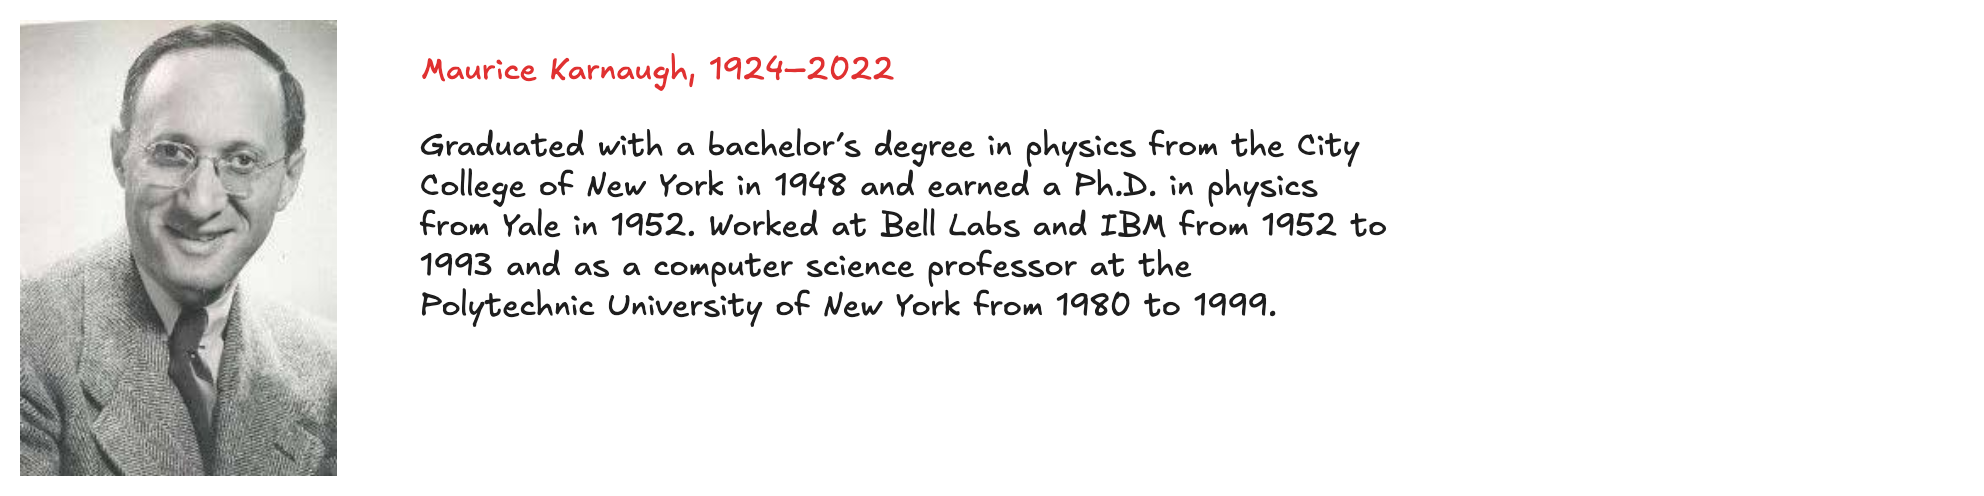

To understand the idea, we need to introduce the concept of logic geometry, which provides a geometric interpretation of binary numbers and their relationships.

## Geometry of Logic

A binary number with n bits can be represented as a **point in an n-dimensional space**. To understand this idea, consider first the set of binary numbers with just one bit (0 and 1). These two possible values can be represented as two points along a **one-dimensional line**. This representation is known as a **1-cube** (or n-cube of order 1). If we had only one possible value (for instance, 0 alone), it would correspond to a **0-cube**, which is simply a single point in a degenerate zero-dimensional space.

If we now consider the set of binary numbers with **two bits** ({00, 01, 10, 11}), we can represent them as **four points** (the vertices of a **square**) in a two-dimensional space. This figure is called a **2-cube** (or n-cube of order 2). It can be obtained by taking the 1-cube, projecting it into a second dimension, and adding a 0 or 1 as a suffix to each of the original points.

By applying a similar projection method, it is possible to obtain a cube of higher dimension. For example, the representation of all 3-bit binary numbers can be derived by projecting the 2-cube and adding a prefix 0 to the points of the original 2-cube, and a prefix 1 to the points of the projected one. The resulting figure is a **3-cube** (or n-cube of order 3):

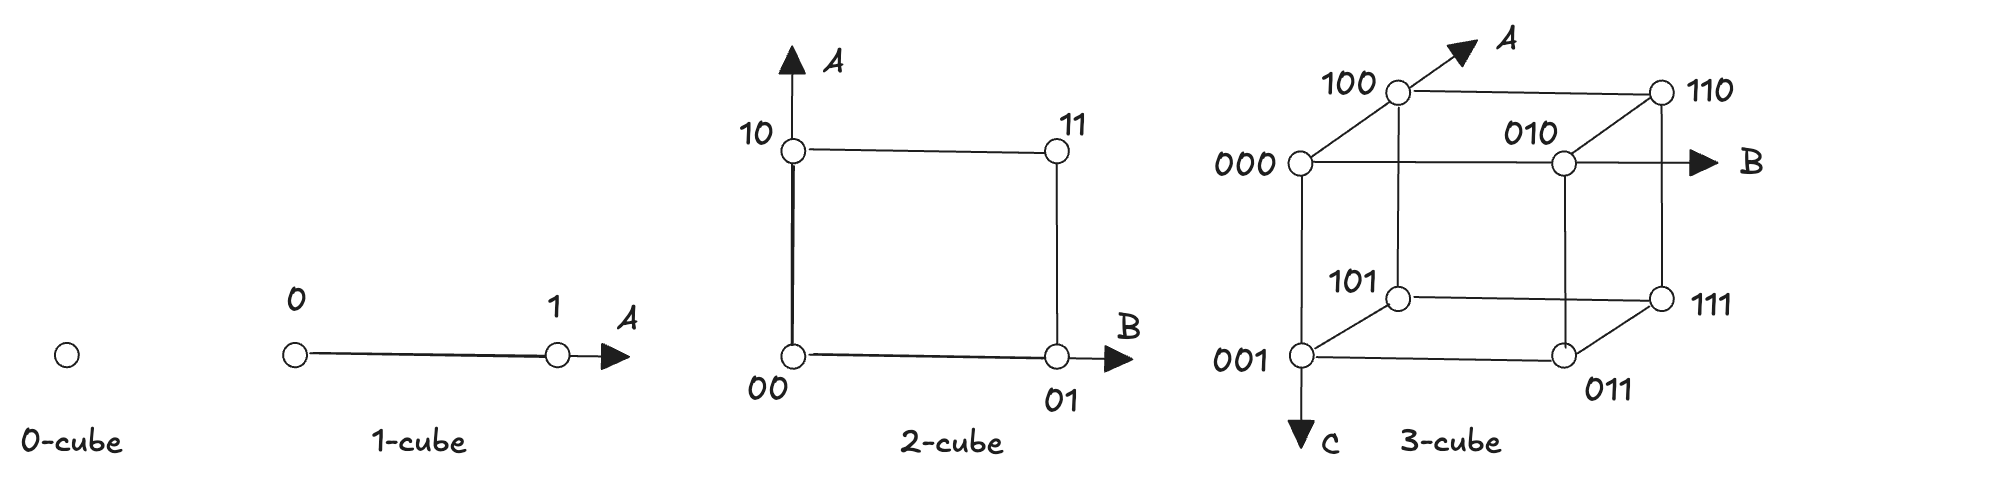

### Logical adjacency

When moving along one edge of the cube (from one vertex to its geometrically adjacent vertex) only **one variable changes value**. This reflects a condition of **logical adjacency**, which occurs between two combinations of variables that differ in the value of a single variable; in other words, they are at **distance 1**.

### Unfolding

To represent the three-dimensional cube in two dimensions, we can **unfold** it onto a plane. The goal of this operation is to arrange the cube’s eight vertices so that their **spatial adjacency is preserved** as much as possible in the planar layout. Each vertex represents one combination of the three binary variables, and adjacency between vertices corresponds to combinations that differ in only one variable:

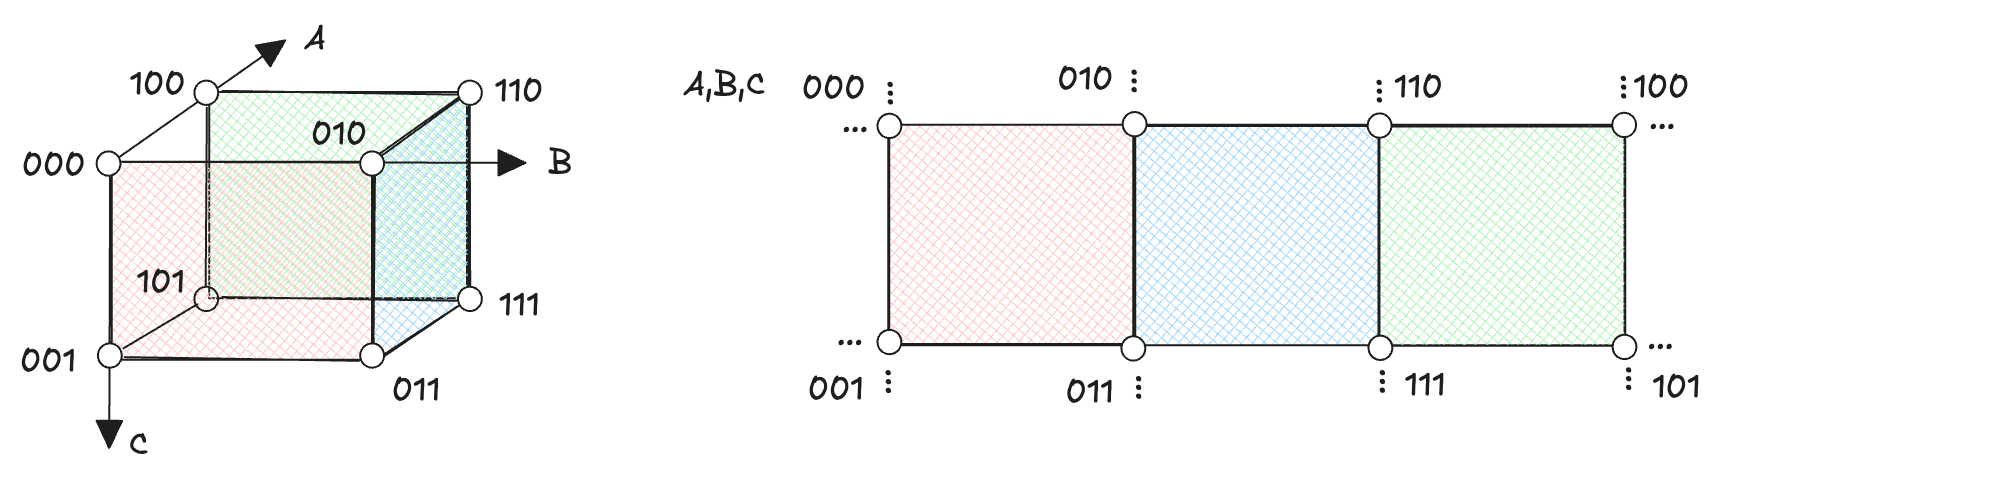

To maintain this adjacency, the variables must be ordered according to the **Gray code sequence** rather than the ordinary binary order. In Gray code, successive combinations differ by only a single bit—exactly the property we need to preserve logical adjacency. For example, the order of A and B in the horizontal direction  we follows 00, 01, 11, 10, instead of the usual 00, 01, 10, 11. When the cube is unfolded, each pair of adjacent squares in the map corresponds to faces of the cube that share a common edge.

The same approach cube can be generalized to higher dimensions. Even though we cannot directly visualize a 4-cube, we can represent its structure through unfolded diagrams, where adjacency between vertices is preserved according to the same principle as before. The Gray code ordering ensures that neighboring points in the representation still differ in the value of just one variable:

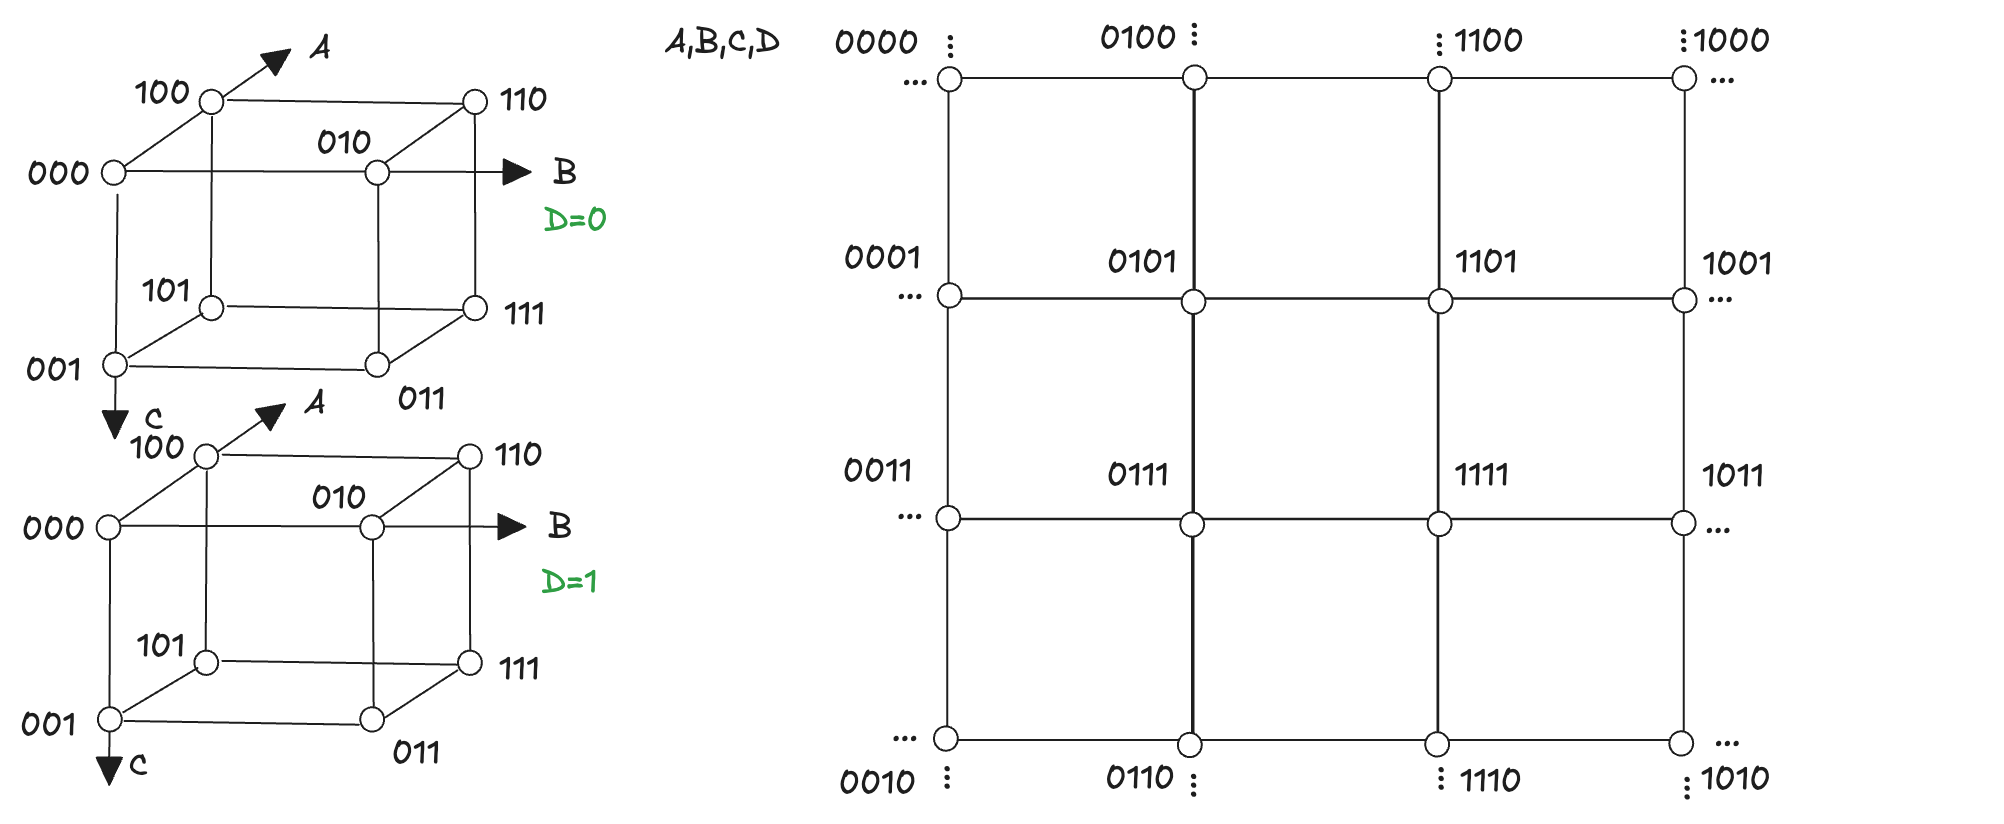

As the number of variables increases, the dimensionality of the cube and thus the number of vertices grows exponentially. However, the geometric relationships and adjacency rules remain consistent: each vertex is connected to n others, corresponding to the n variables that can change value independently. This geometric framework provides a powerful way to reason about logical relationships and adjacency, even in higher dimensions where visualization is no longer possible.

## Karnaugh maps

The Karnaugh map is derived from the cube and maintains the same topological relationships as the original three-dimensional figure. Vertices that were adjacent in the cube remain adjacent in the map:

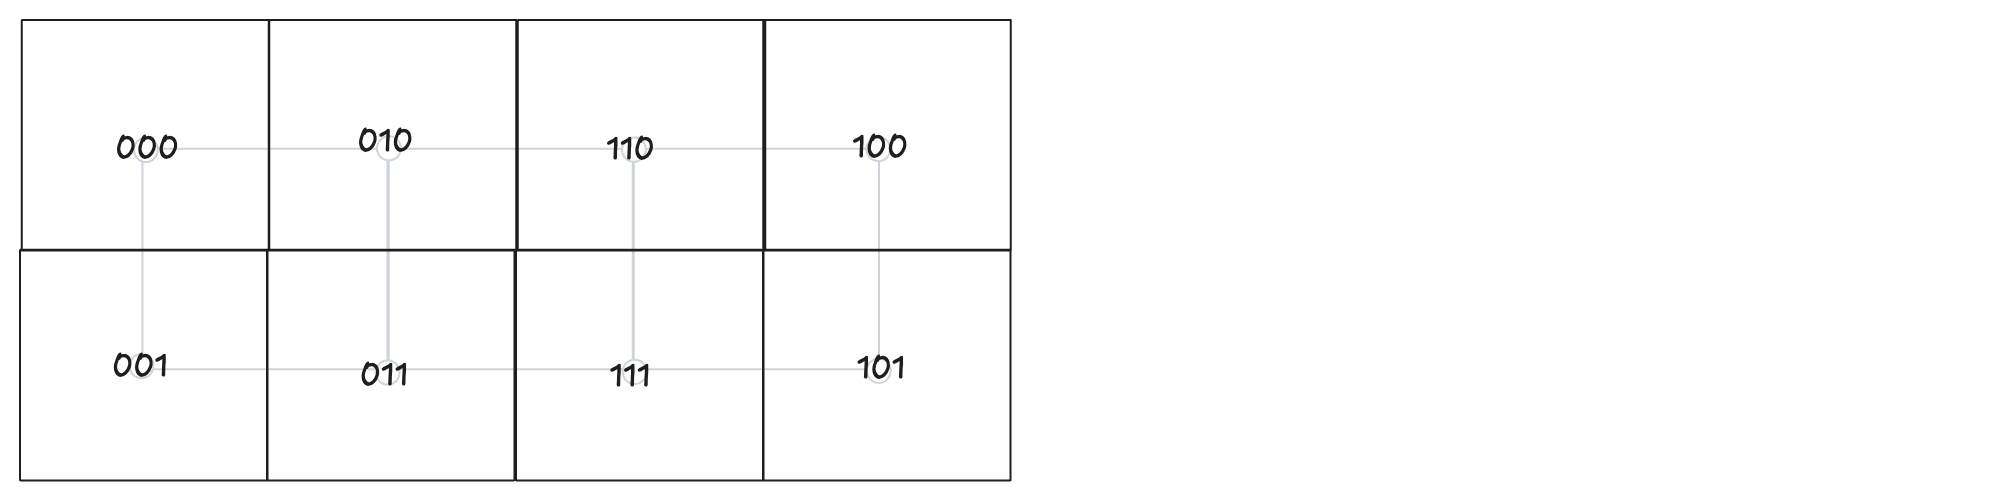

We can observe the following:

- In the **four lower cells**, C=1
- In the **four upper cells**, C=0
- In the **four cells on the right**, A=1
- In the **four cells on the left**, A=0
- In the **four central cells**, B=1
- In the **four outer cells**, B=0

This shows that the **regions of the map** can be represented using the variables as the "coordinates" of the cells. One approach, labels the rows and columns directly with the values of the variables:

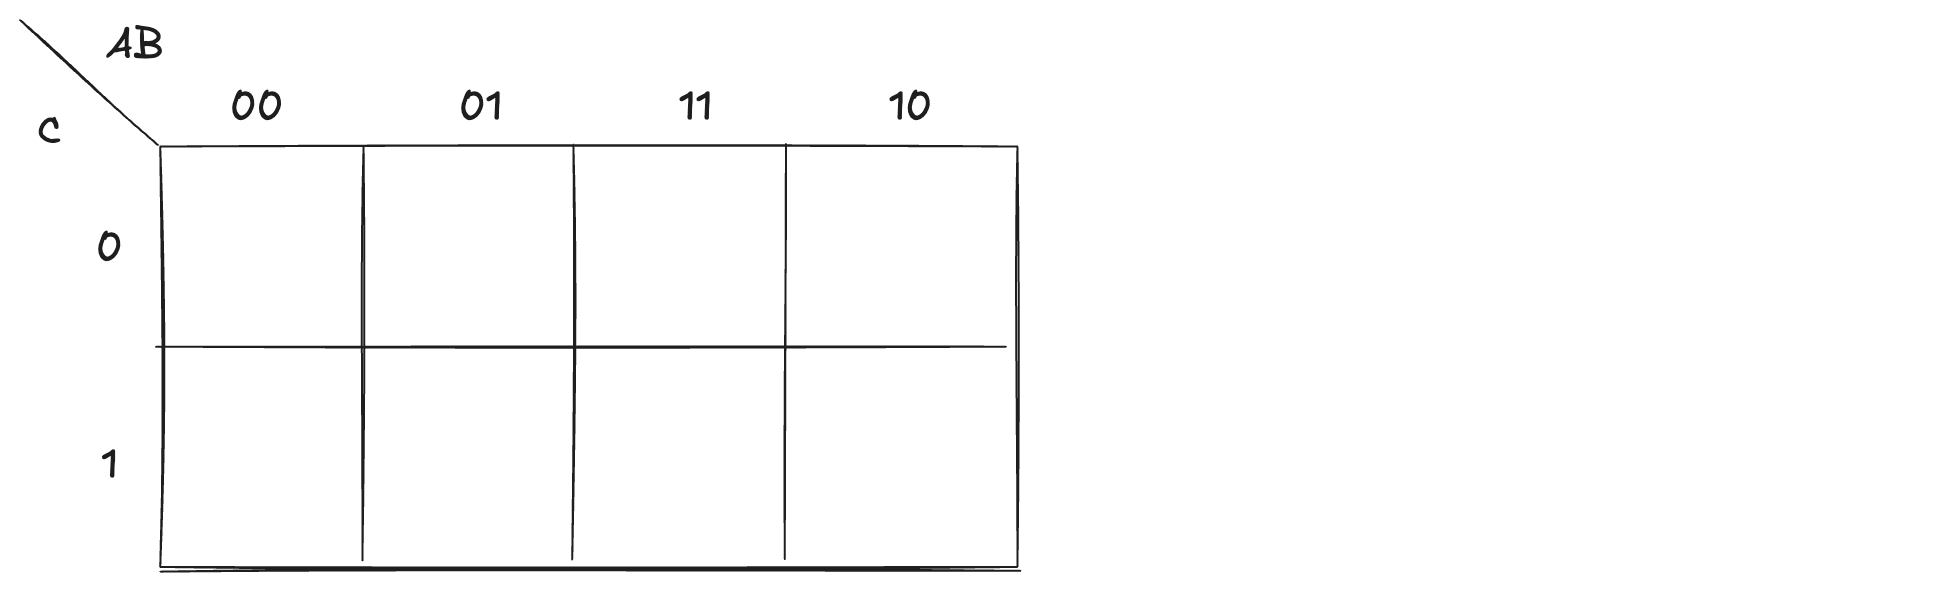

A second, more geometric method, divides the map into areas corresponding to the regions where each variable equals 1:

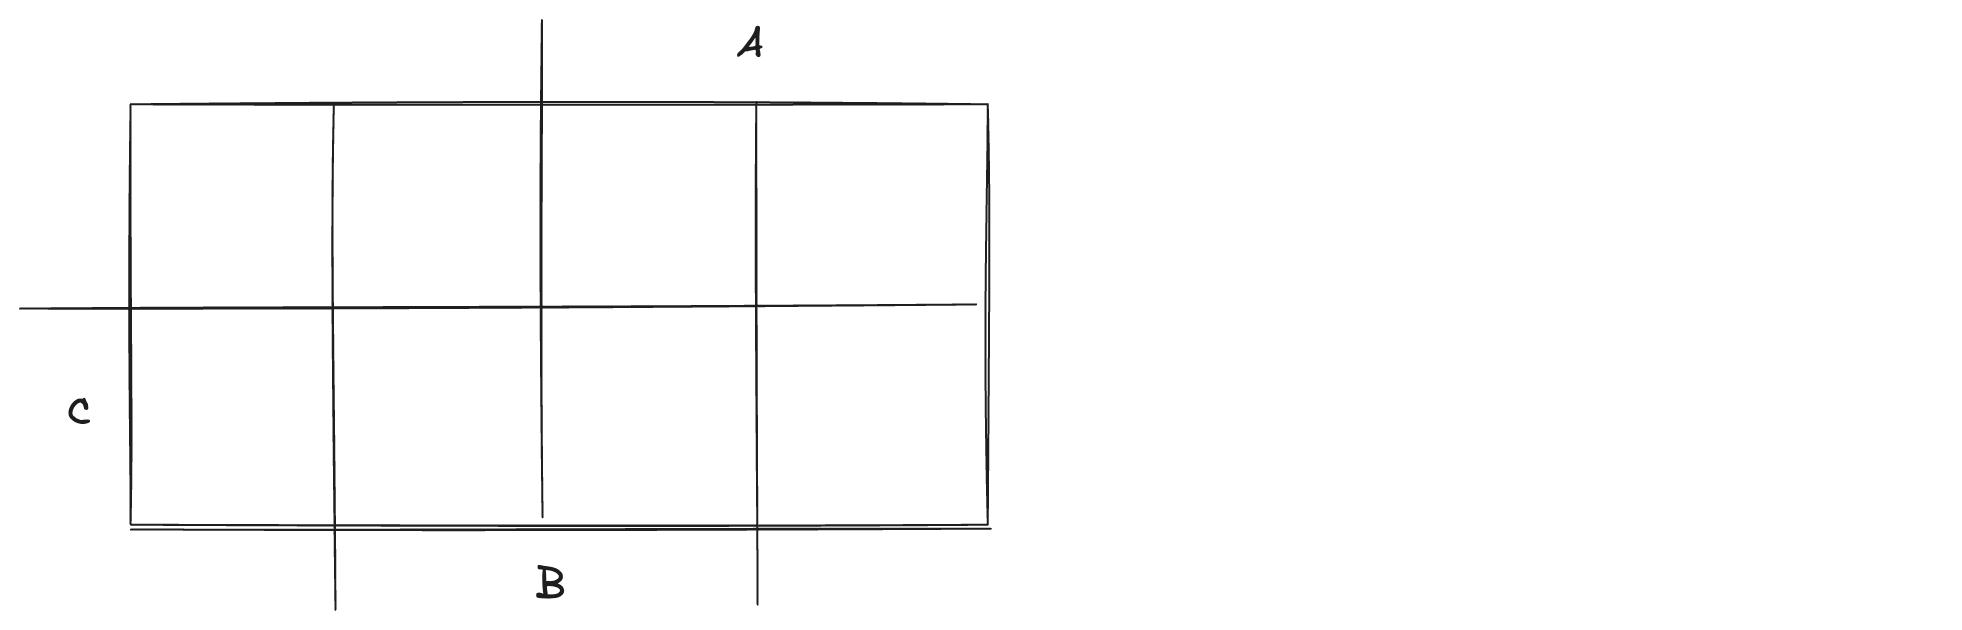

Similar reasoning can be applied to the case of four variables, leading to the construction of a **4-variable Karnaugh map**:

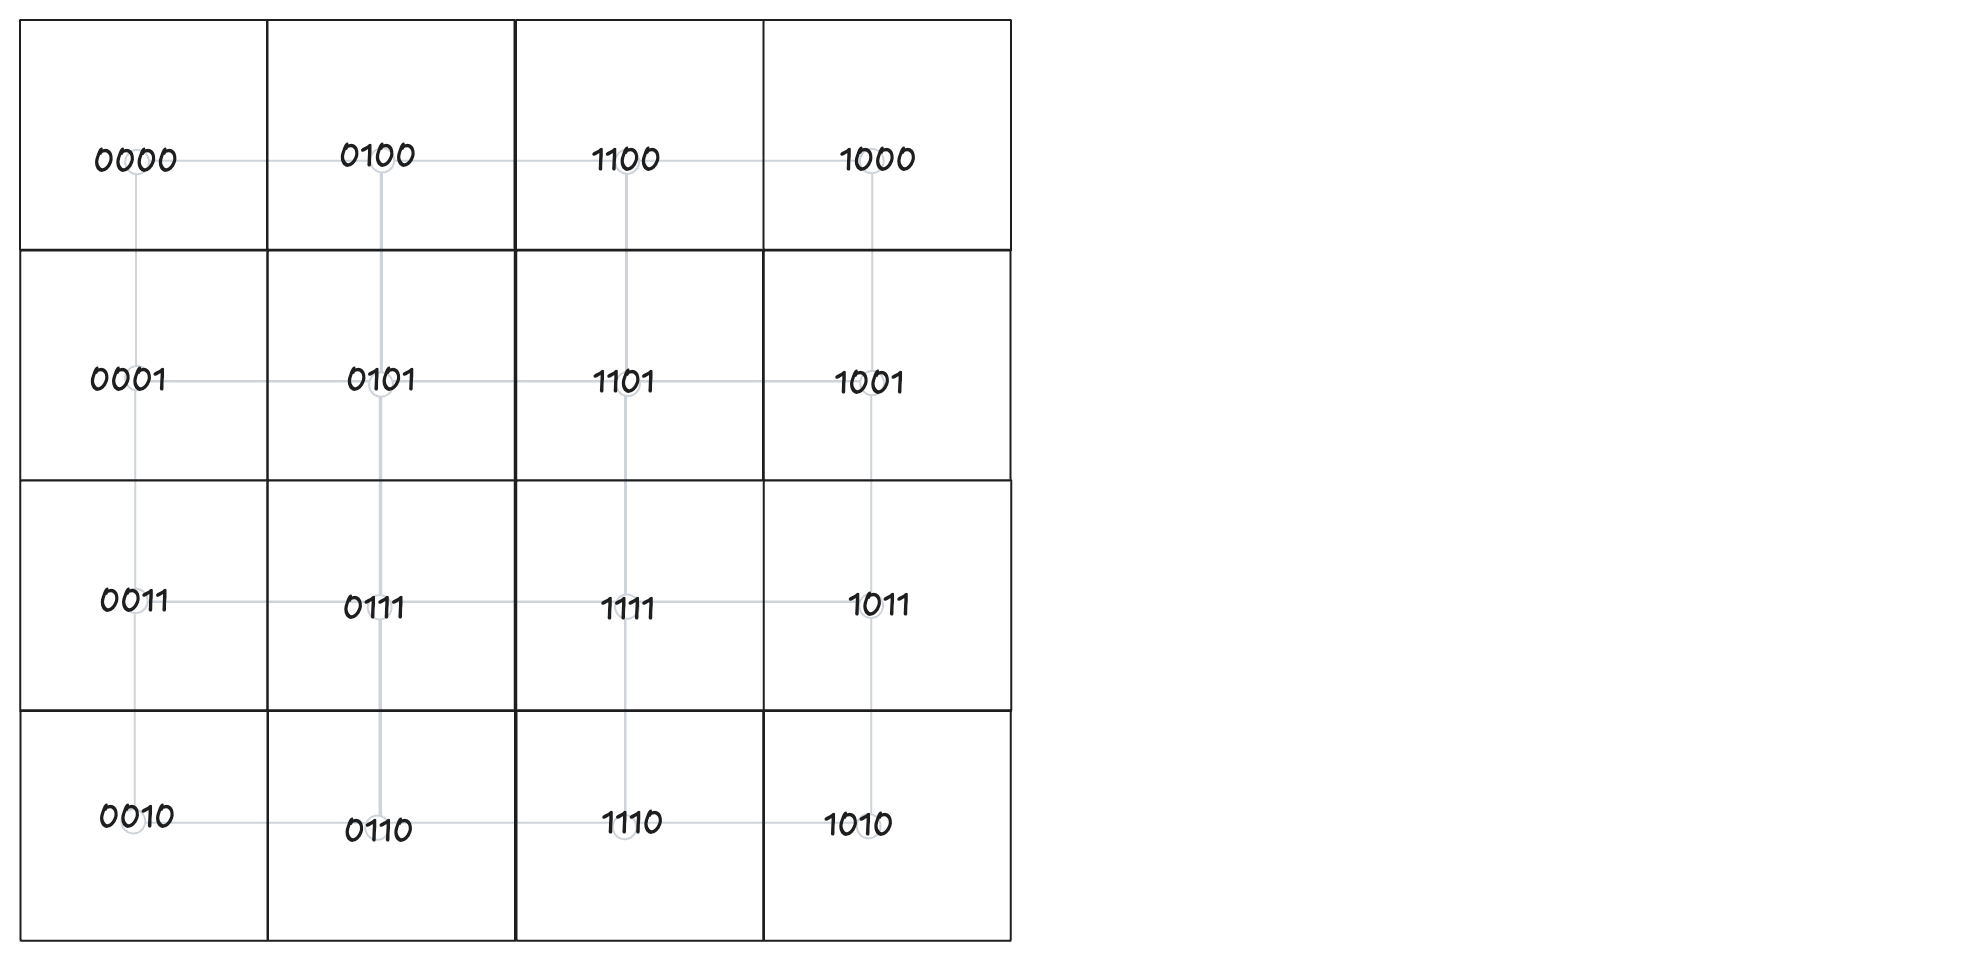

Again, we use the variables as "coordinates" to define the regions of the map. The Gray code ordering is preserved, ensuring that adjacent cells differ by only one variable, which is crucial for simplifying Boolean expressions effectively:

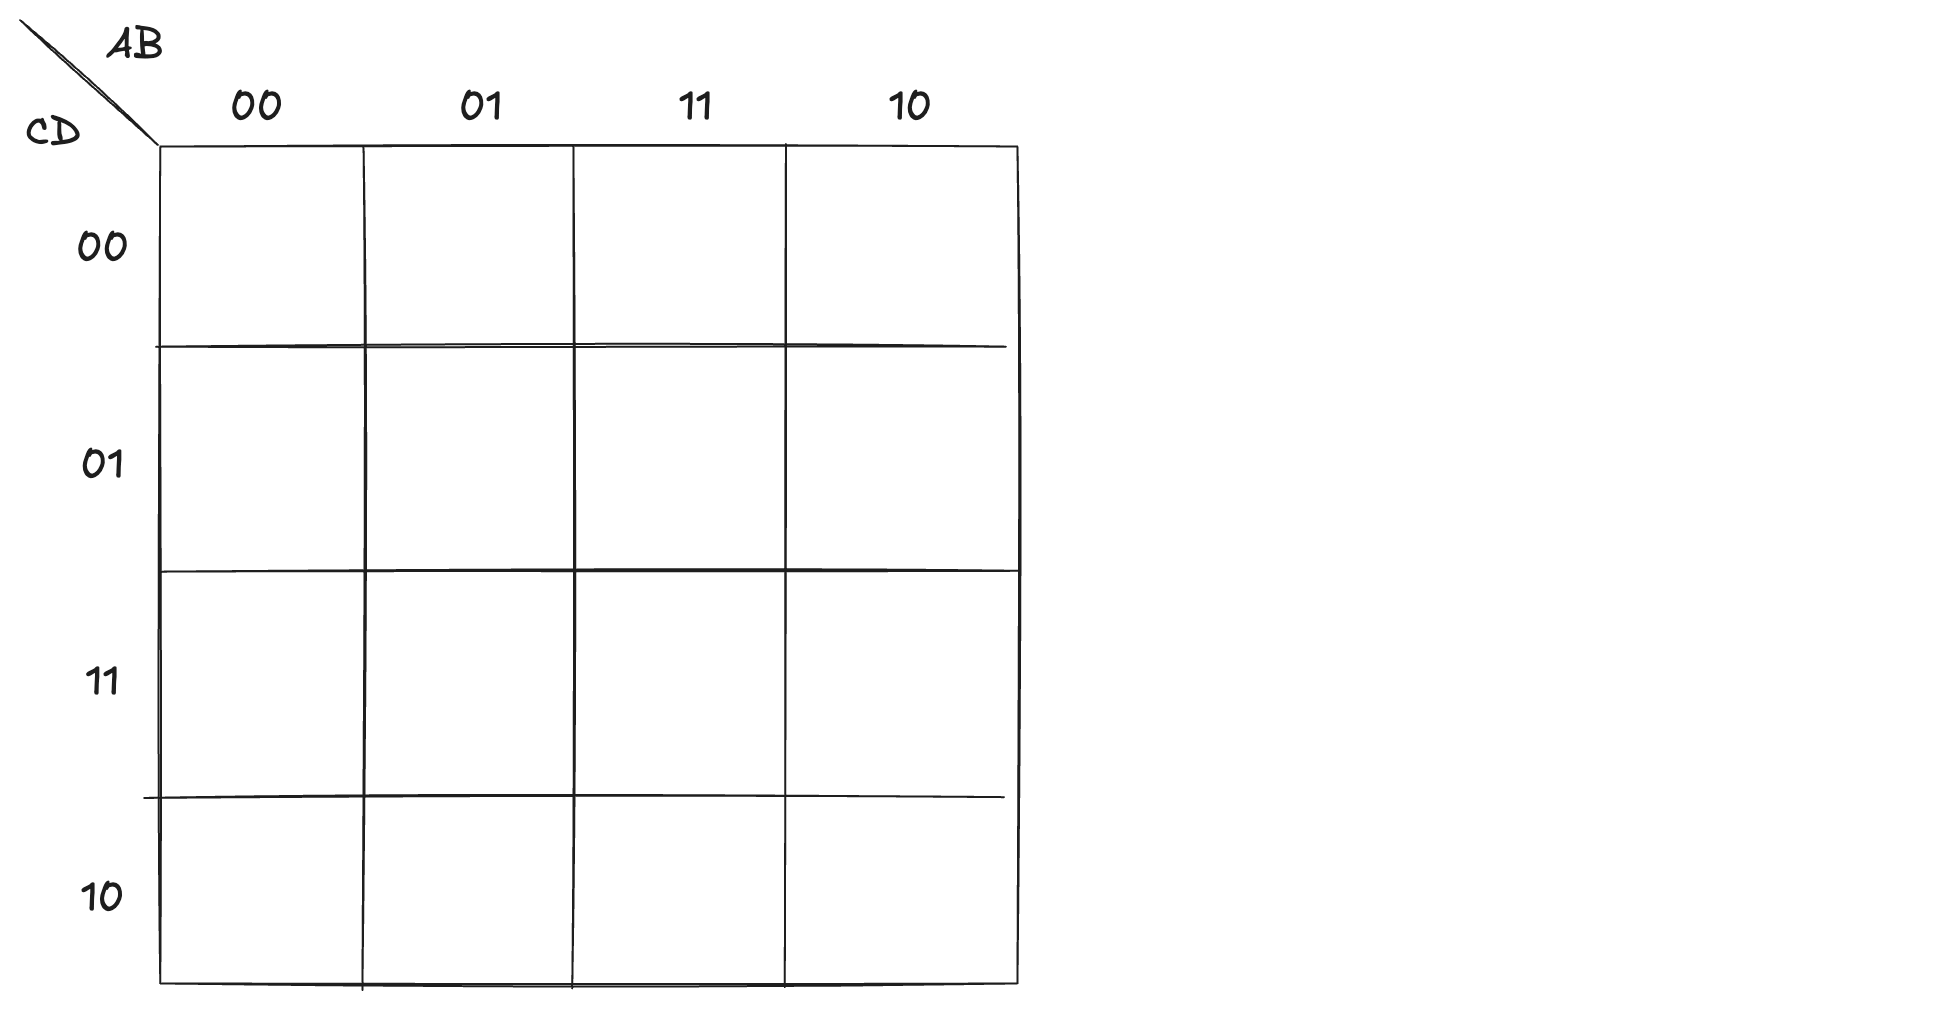

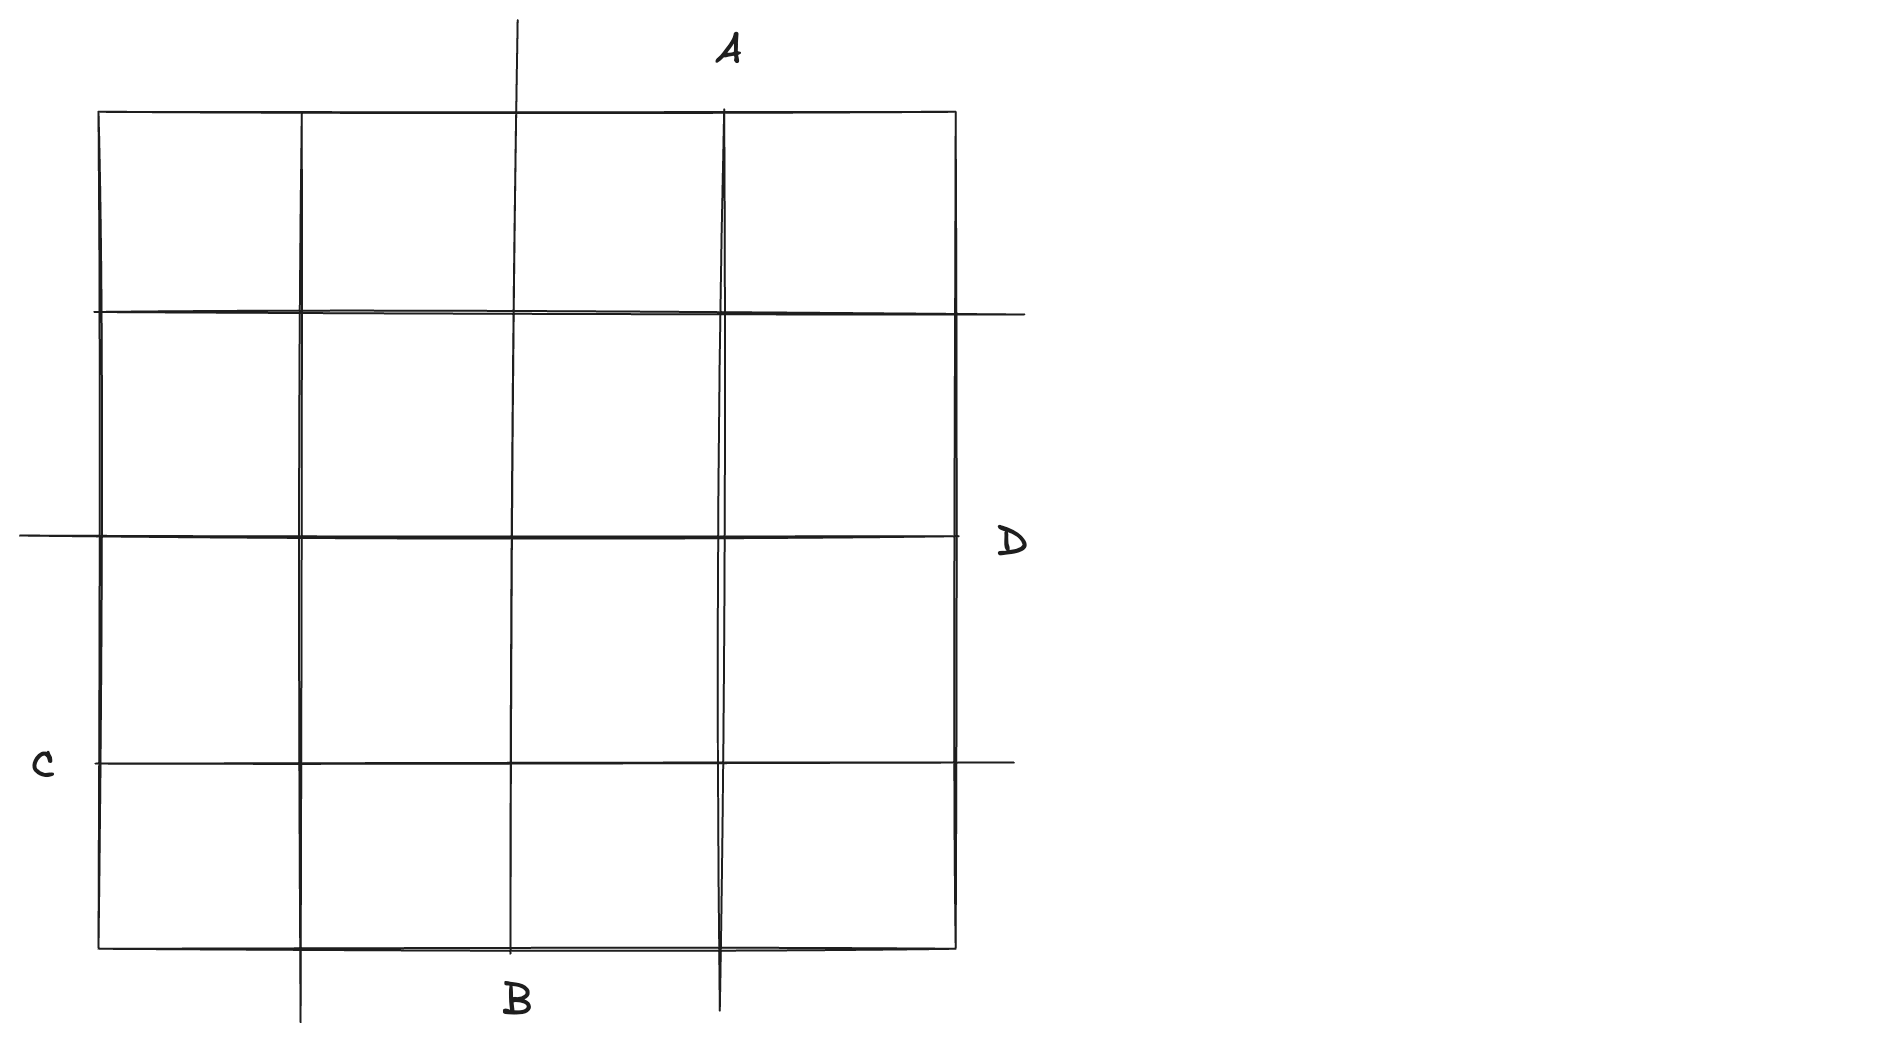

### Construction

Suppose we have a logic function with three inputs, A, B, and C. The corresponding truth table lists all eight possible combinations of these three binary variables (from 000 to 111), together with the output value for each combination:

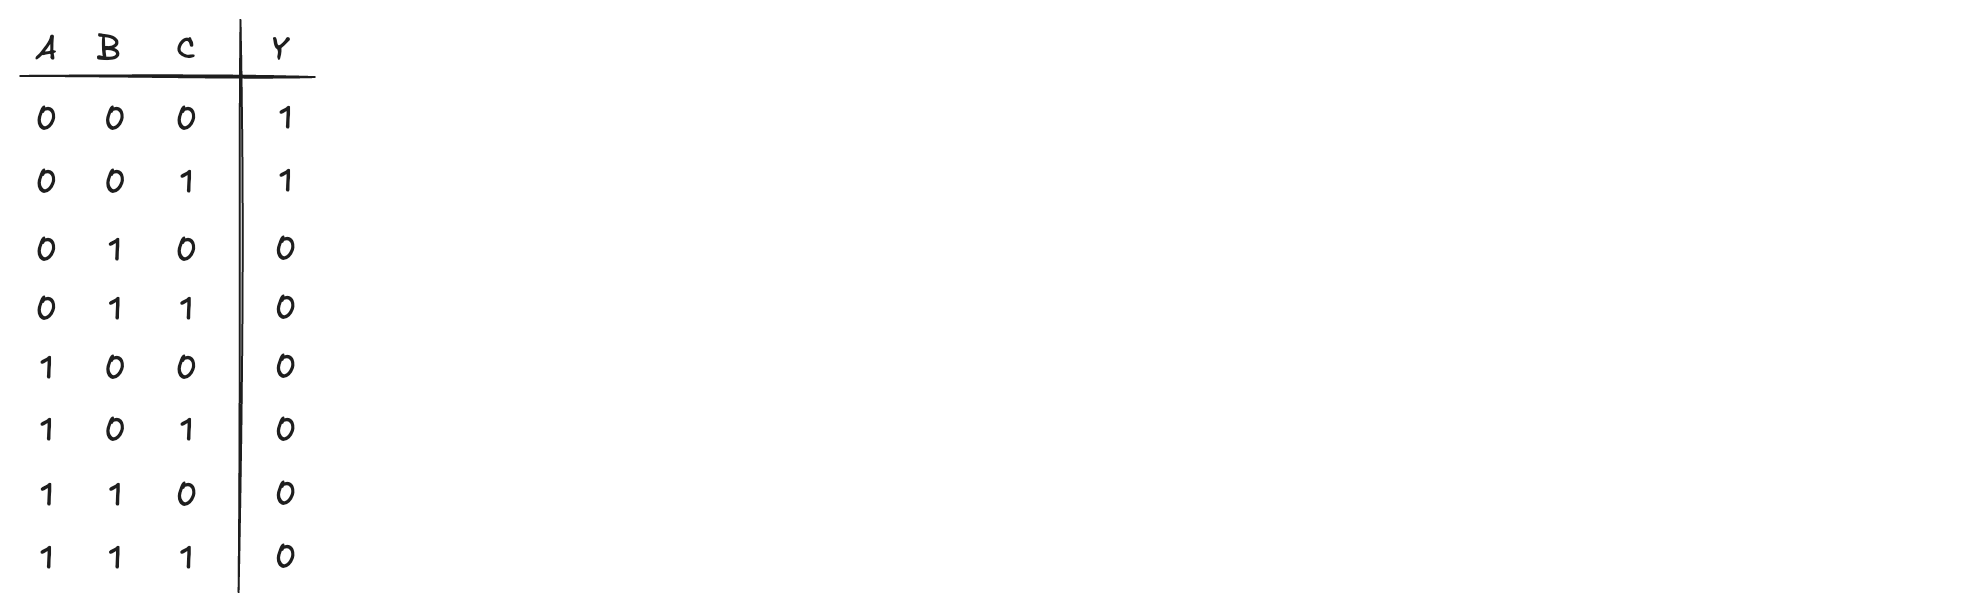

We can use the Karnaugh map as a **graphical reorganization** of this same information.  Each cell corresponds to one row of the truth table, that is, to one specific combination of A, B, and C, and contains the value of the output for that combination:

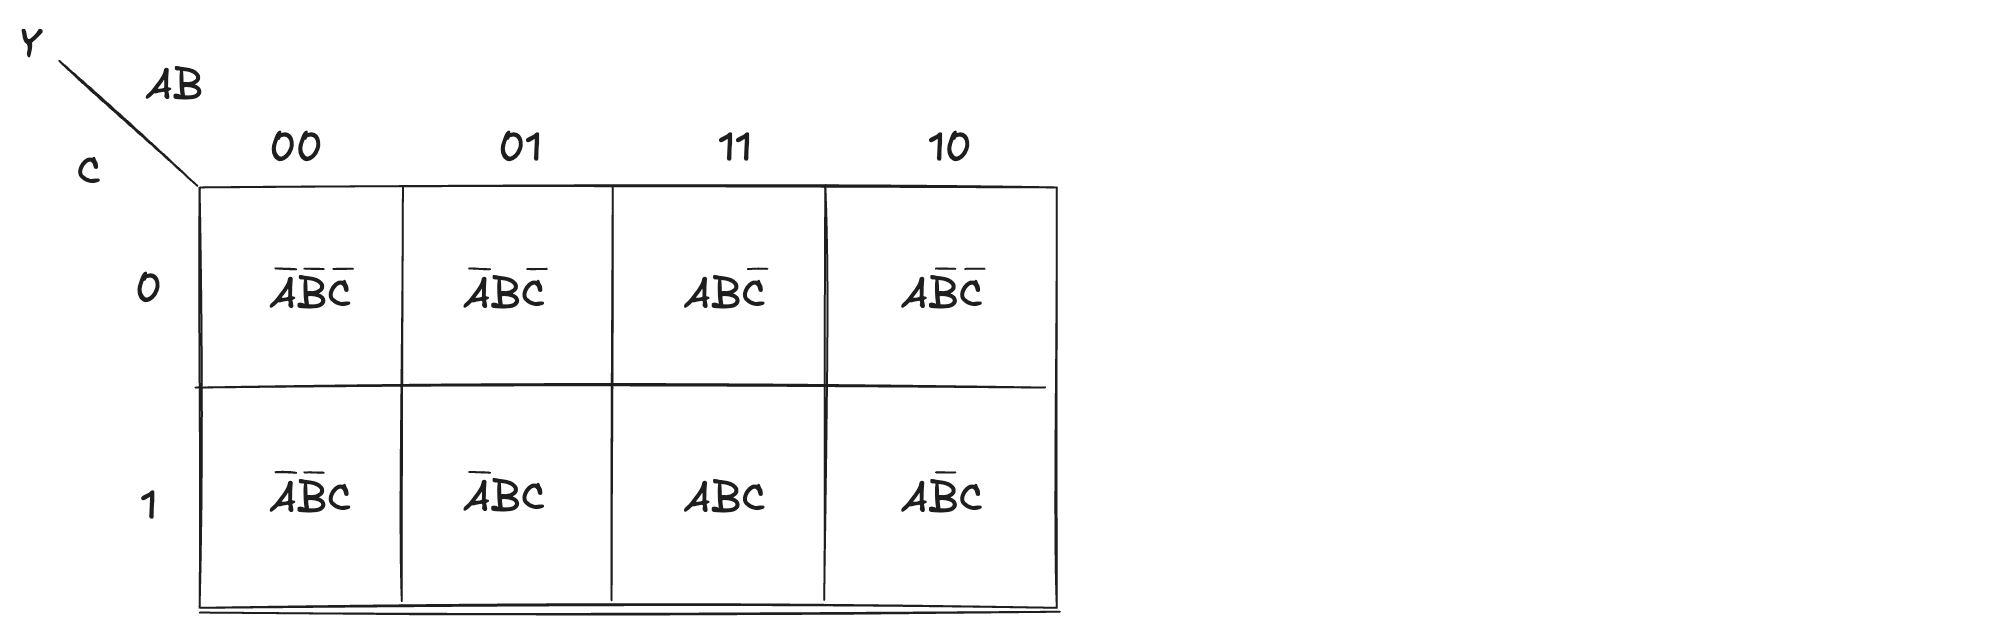

In Boolean algebra, each cell corresponds to a minterm, a product term that is true for that single input combination. For instance, the top-left square in the map corresponds to the case where: 

$A=0, B=0, C=0$

The corresponding minterm is therefore:

$\overline{A} \, \overline{B} \, \overline{C}$

In the example truth table, the output for this case is 1, meaning the function is true when all inputs are zero. There are another 1, corresponding to the input combinations: 

$A=0, B=0, C=1$

The corresponding minterm is:

$\overline{A} \, \overline{B} \, C$

These two are placed in **adjacent cells** of the map, making it easy to see possible groupings for simplification:

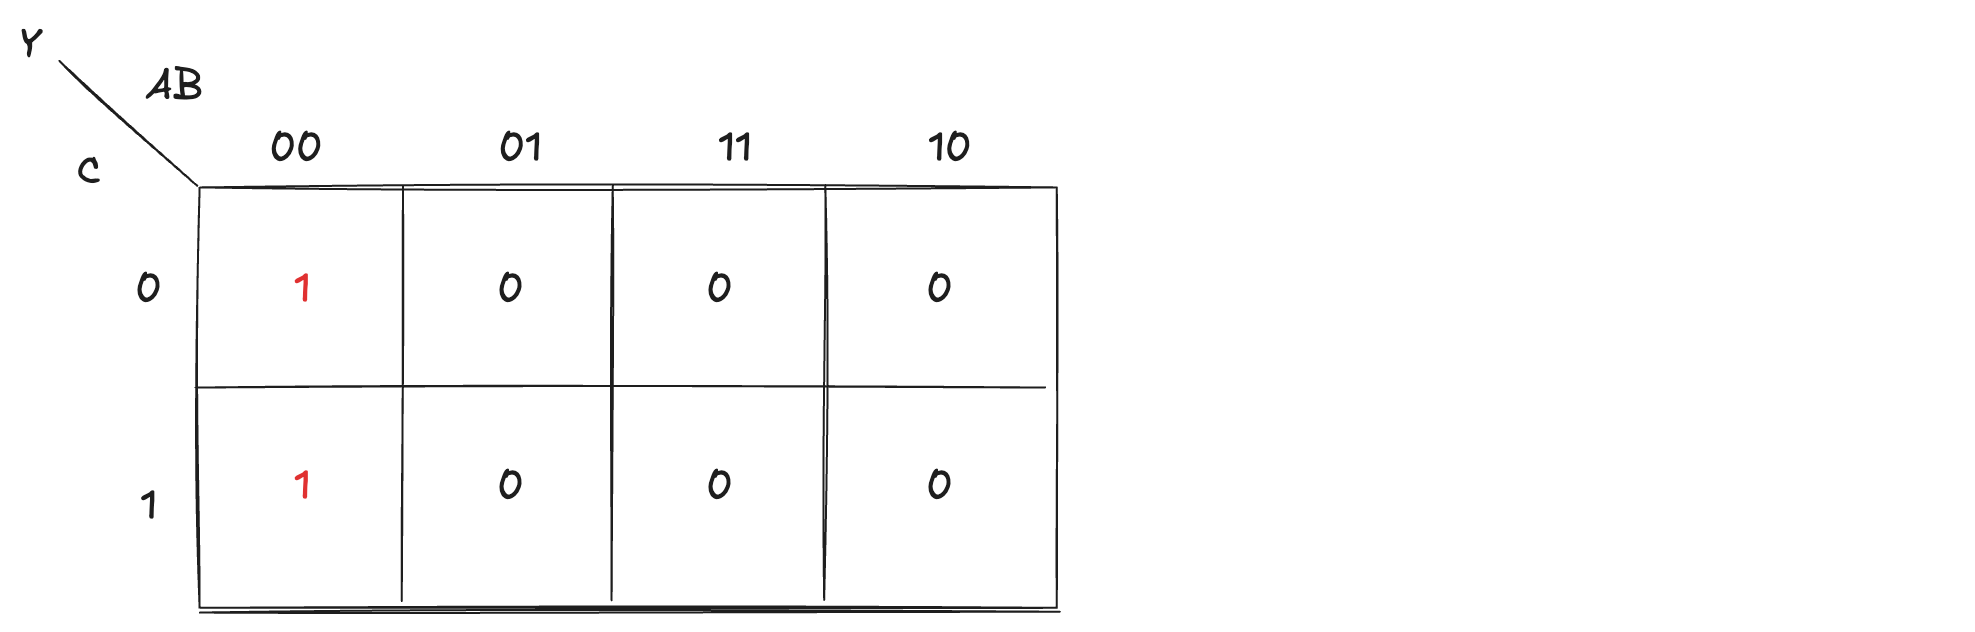

When observing the structure of a the map, an important property becomes immediately clear: **each square differs from its adjacent squares by the value of only one variable**. This characteristic is what makes simplification so straightforward: two adjacent cells in the map represent minterms that share all but one variable in common. The variable that differs appears in its true form in one cell and in its complemented form in the other. For example, the minterms:

$\overline{A}\,\overline{B}\,\overline{C}$ 

and 

$\overline{A}\,\overline{B}\,C$ 

are adjacent because they differ only in variable C. This adjacency allows them to be combined algebraically into a simpler term:

$\overline{A}\,\overline{B}$

effectively eliminating the variable C.

### Wrapping around

The K-map also has another subtle but crucial feature: it **"wraps around"**. The map is conceptually arranged on the surface of a **torus** (a doughnut shape), so that the first and last columns are considered adjacent, as are the first and last rows. This wrapping maintains the same one-variable difference at the map’s edges. For example, in a three-variable K-map, the first column (where A=0, B=0) and the last column (A=1, B=0) are adjacent, because they differ only in A. Similarly, the top row (C=0) and the bottom row (C=1) are also adjacent:

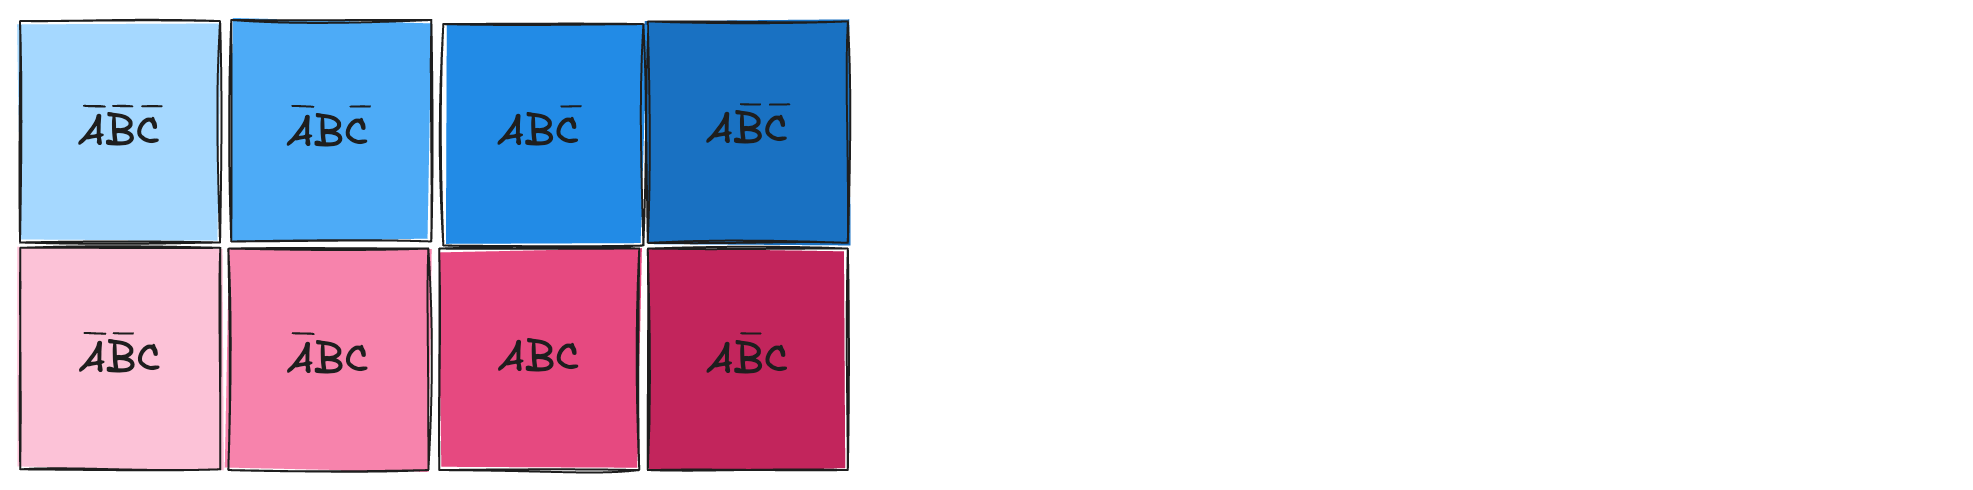

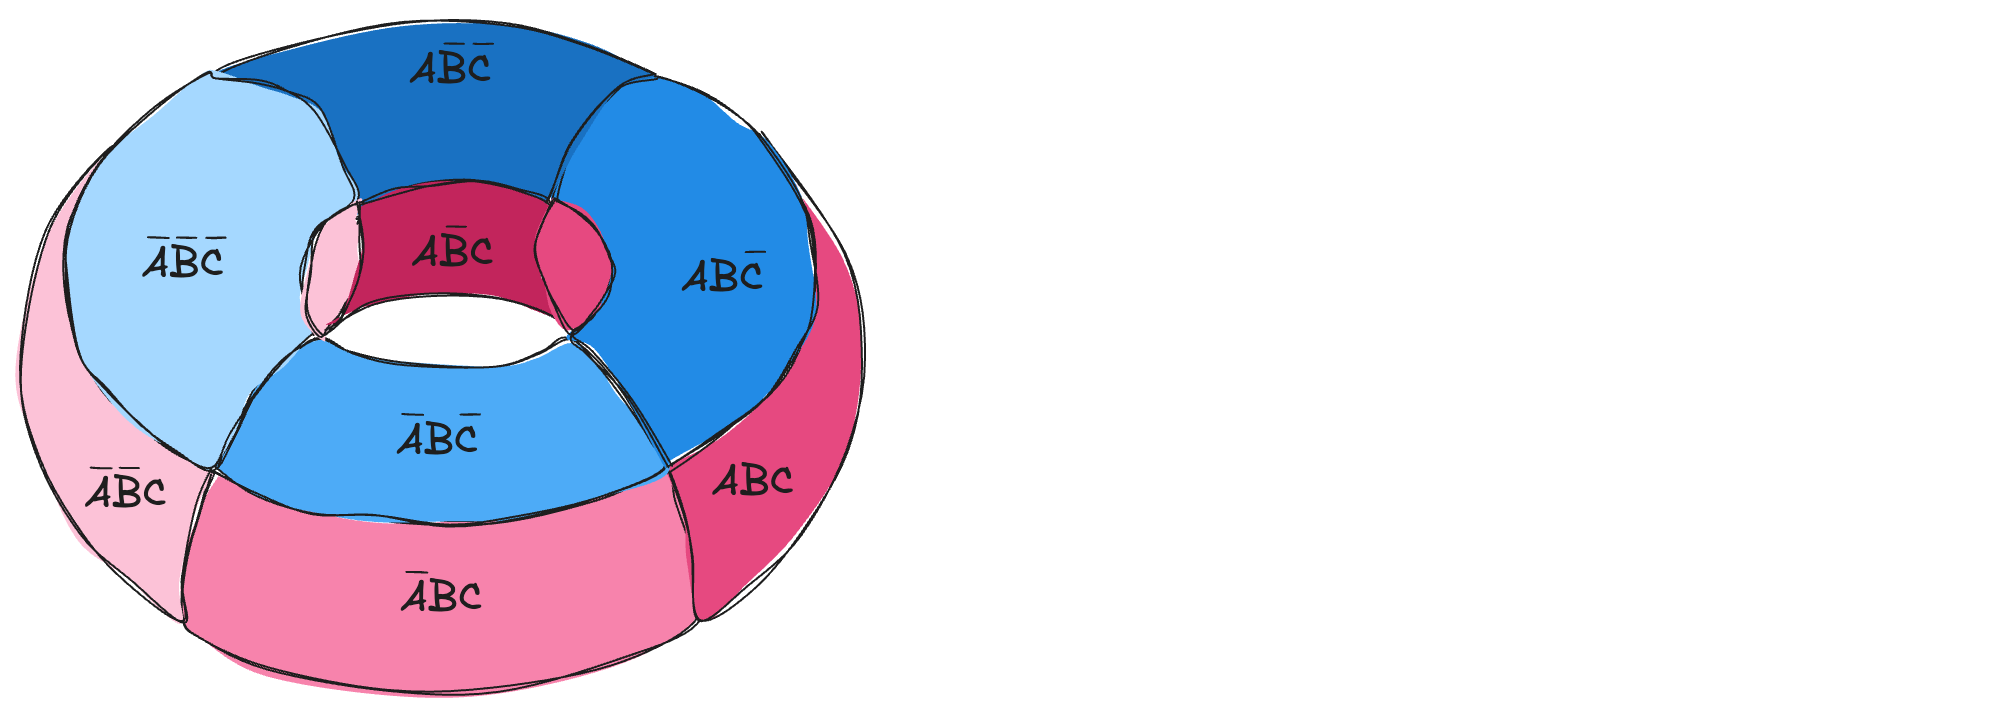

This spatial organization (adjacency by one-variable difference, Gray code ordering, and wrap-around continuity) is what makes the K-map a powerful visualization tool. It allows us to immediately see which terms can be combined, leading to the simplest possible Boolean expressions with minimal effort.

### SOP Synthesis

Consider a truth table for a function with three inputs (A, B, C) and copy the function values intpo the corresponding Karnaugh map cells:

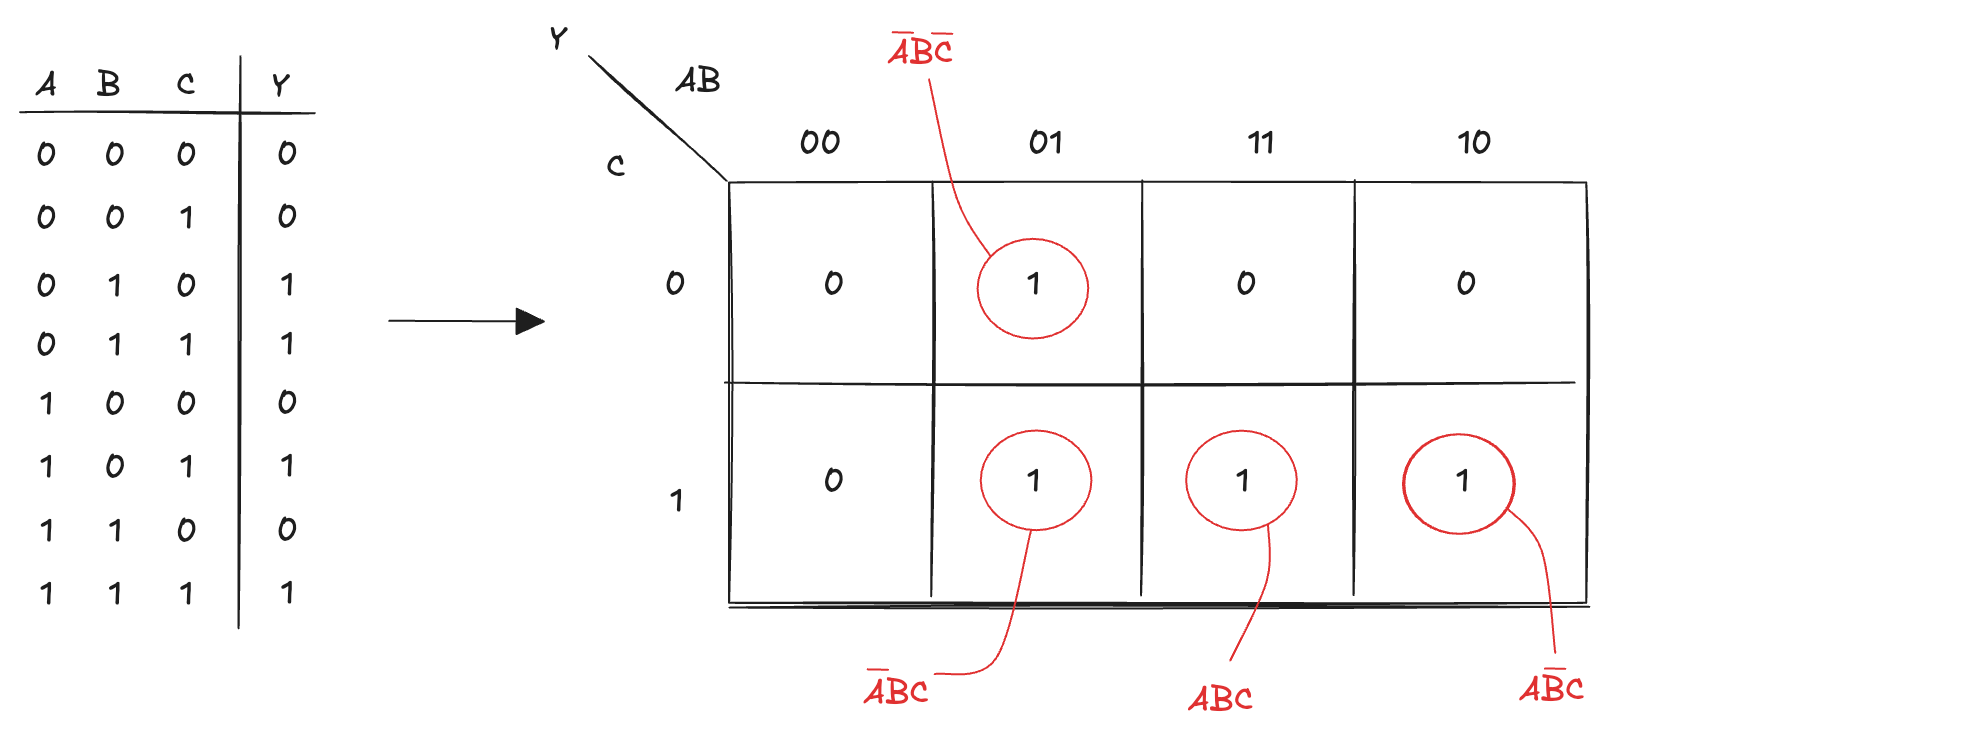

The canonical SOP expression can be derived directly from the map by identifying the minterms (cells with output 1) and writing them as product terms:

$Y = \overline{A}\,B\,\overline{C} + \overline{A}\,B\,C + A\,B\,C + A\,\overline{B}\,C$

Remember that two cells are adjacent when they are at distance 1 (that is, when their corresponding input combinations differ by the value of only one variable). On the map, this means we can group together adjacent 1s that differ in a single variable, forming one-dimensional subcubes, also known as **groupings**:

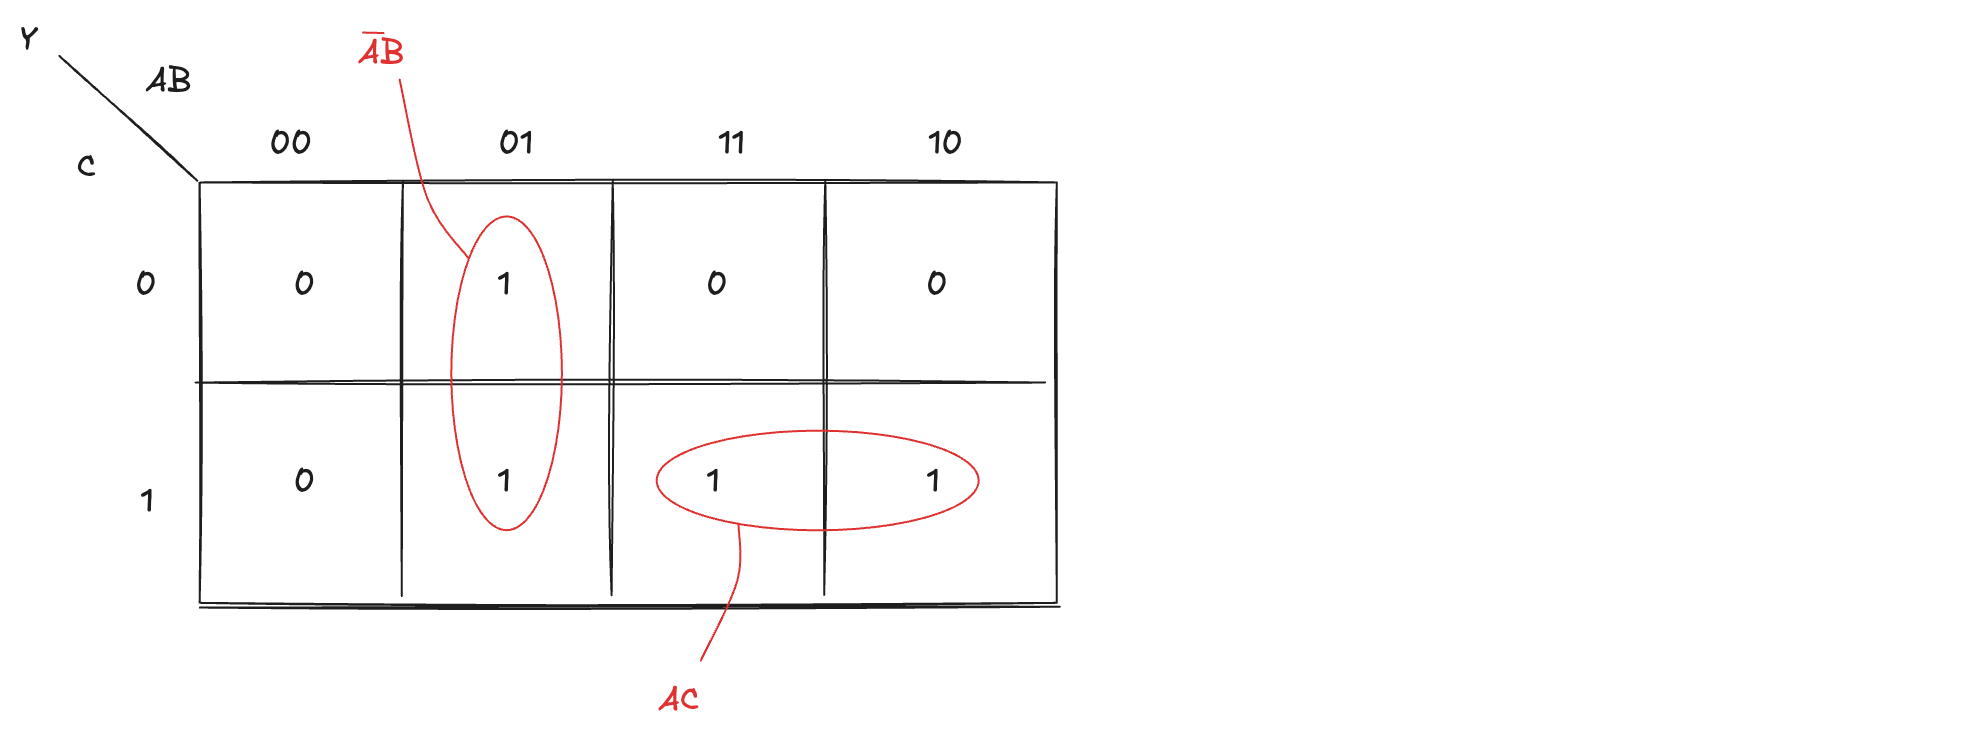

In each grouping, **one variable changes** its value **while the others remain constant**. For every grouping, we can therefore write a term that includes only the variables that do not change, ignoring the one that varies. From the horizontal grouping we obtain the term:

$A\,C$

This corresponds to the region where A=1 and C=1, while B takes on different values. Similarly, for the vertical grouping, we have:

$\overline{A}\,B$

This represents the area where A=0 and B=1, while C varies. Finally, by summing the two terms, we directly obtain the **minimized expression**:

$ Y= \overline{A}\,B + A\,C$

This is exactly the same result we can derive using algebraic manipulation:

$Y = \overline{A}\,B\,\overline{C} + \overline{A}\,B\,C + A\,B\,C + A\,\overline{B}\,C$

$= \overline{A}\,B(\overline{C} + C) + A\,C(B + \overline{B})$

$= \overline{A}\,B + A\,C$


Now, consider the following map:

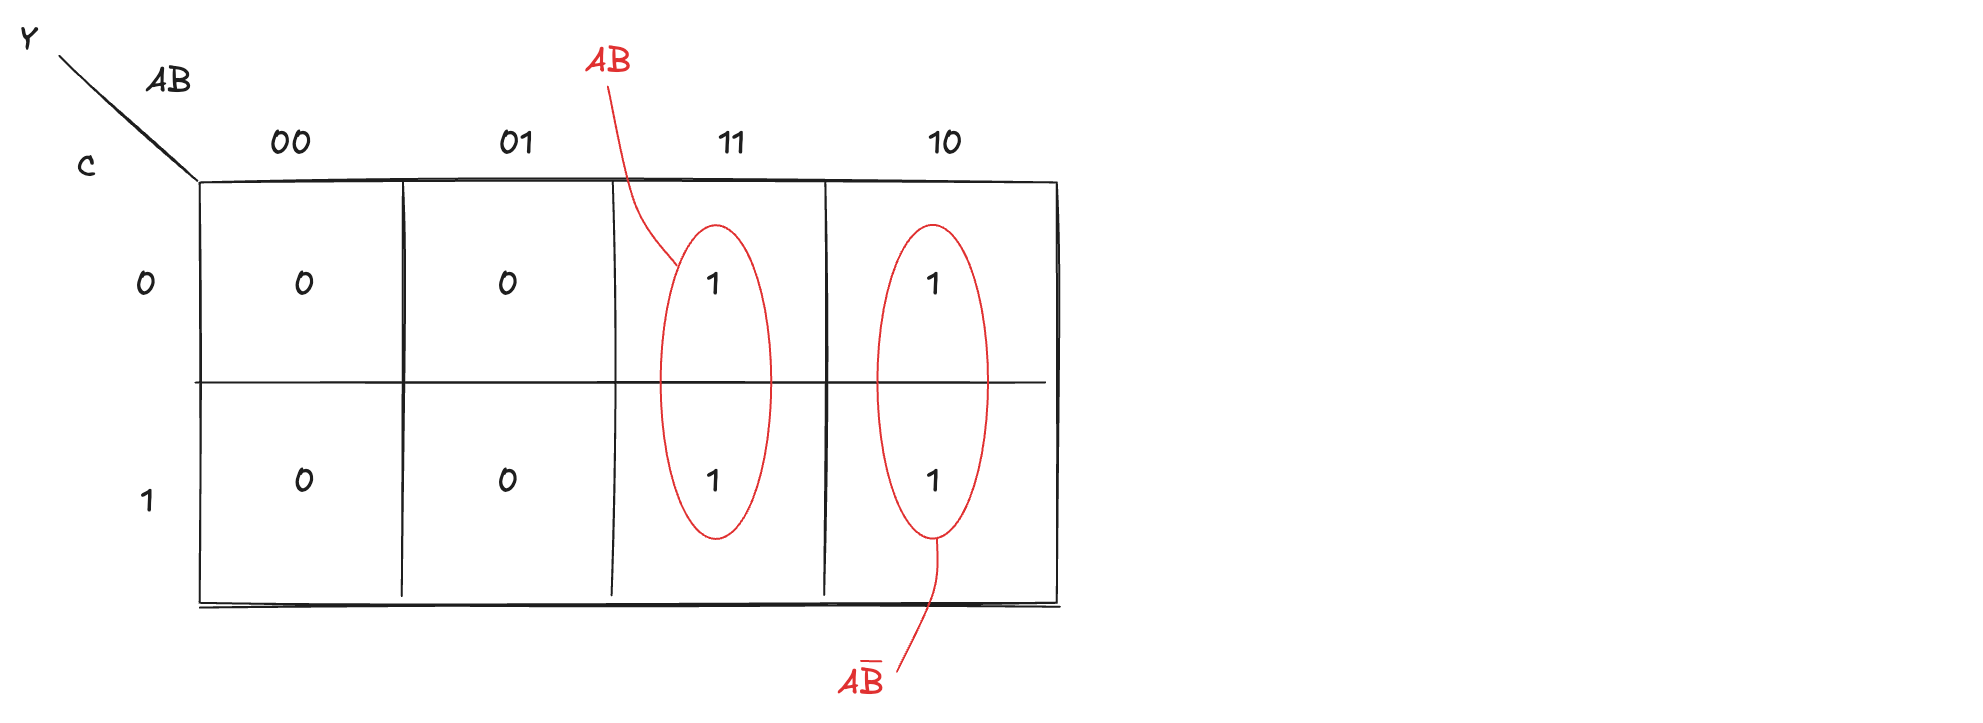

From the two unidimensional groupings, we can derive the minimized expression:

$Y= AB + A\overline{B}$

However, we can also form a **two-dimensional grouping** that includes all four 1s:

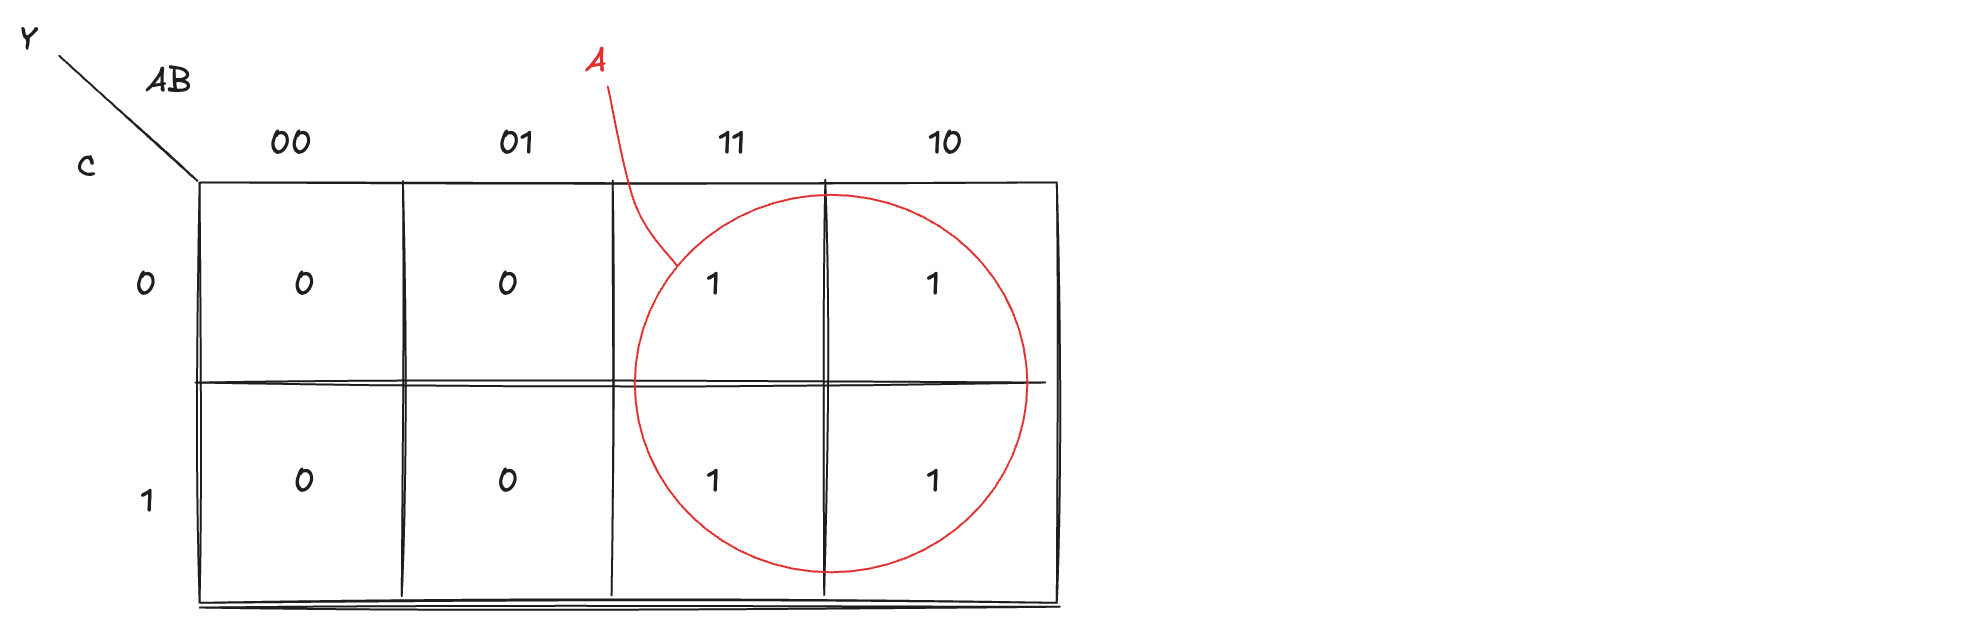

In this subcube, the only variable that does not change is A: thus, the function is
reduced to the expression:

$Y= A$

We could reach the same conclusion usiging algebraic manipulation:

$Y=AB\overline{C} + A\overline{B}\,\overline{C} + ABC + A\overline{B}C$

$= A\overline{C}(B + \overline{B}) + AC(B + \overline{B})$

$= A(\overline{C} + C)$

$= A$

In general, to achieve the most effective simplification, we must **identify the largest possible subcubes**, that is the biggest groupings of adjacent 1s that can be formed on the map. If no larger subcube exists that completely covers a given grouping, that grouping is called a **prime implicant**.

Remember that the maps is **toroidal**, meaning it wraps around both horizontally and vertically. This property allows us to group 1s that are on opposite edges of the map:

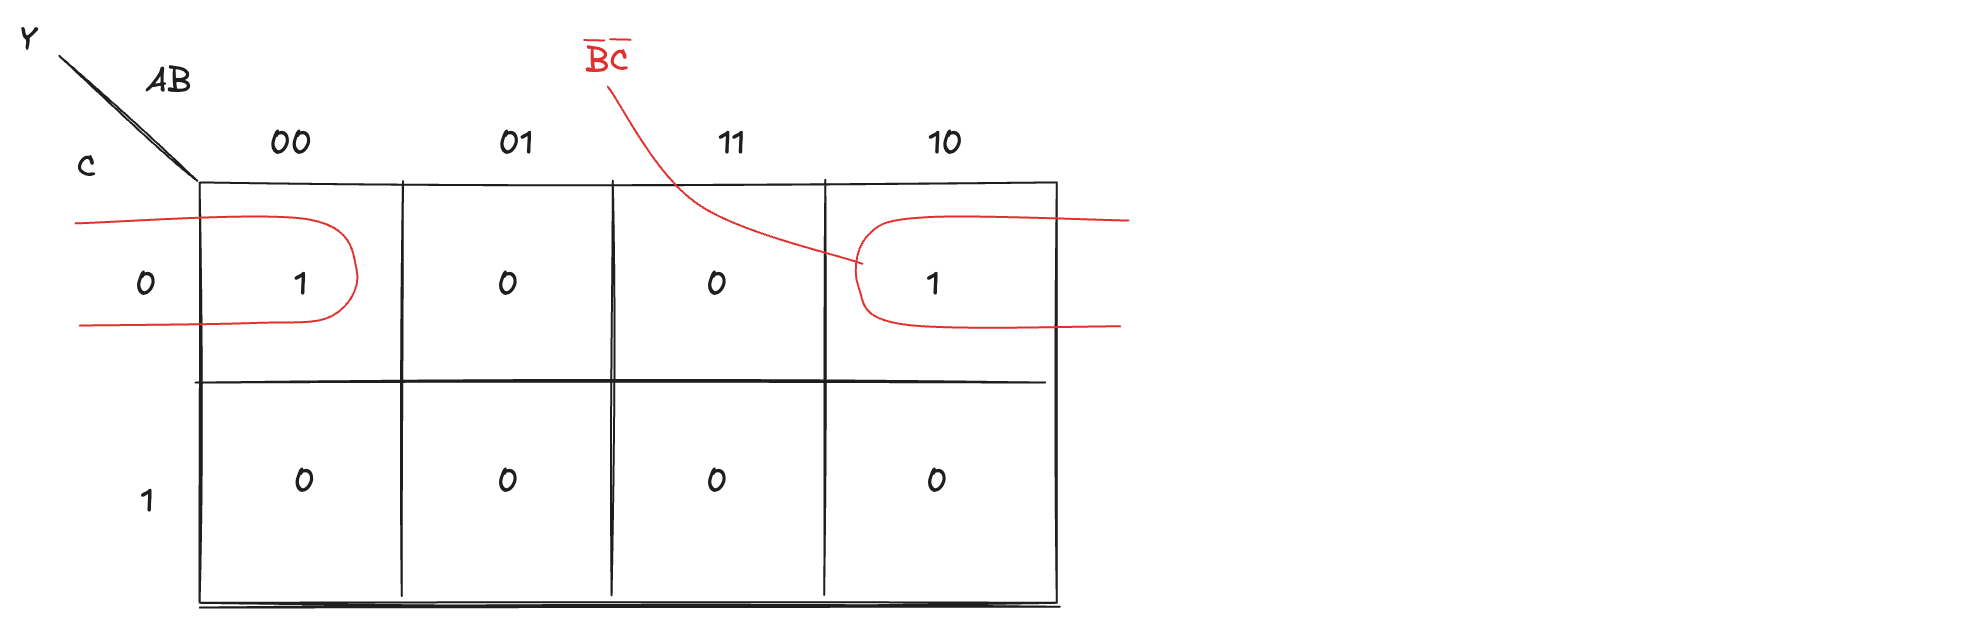

Although it may not seem so at first glance, the two cells in the map are **logically adjacent**. As we have discussed, the **top and bottom edges**, as well as the **left and right edges**, are adjacent. Indeed, if we compare each pair of the highlighted cells, we can see that **only variable A changes value**, confirming that they differ by exactly one variable and are therefore adjacent. Consider another example:

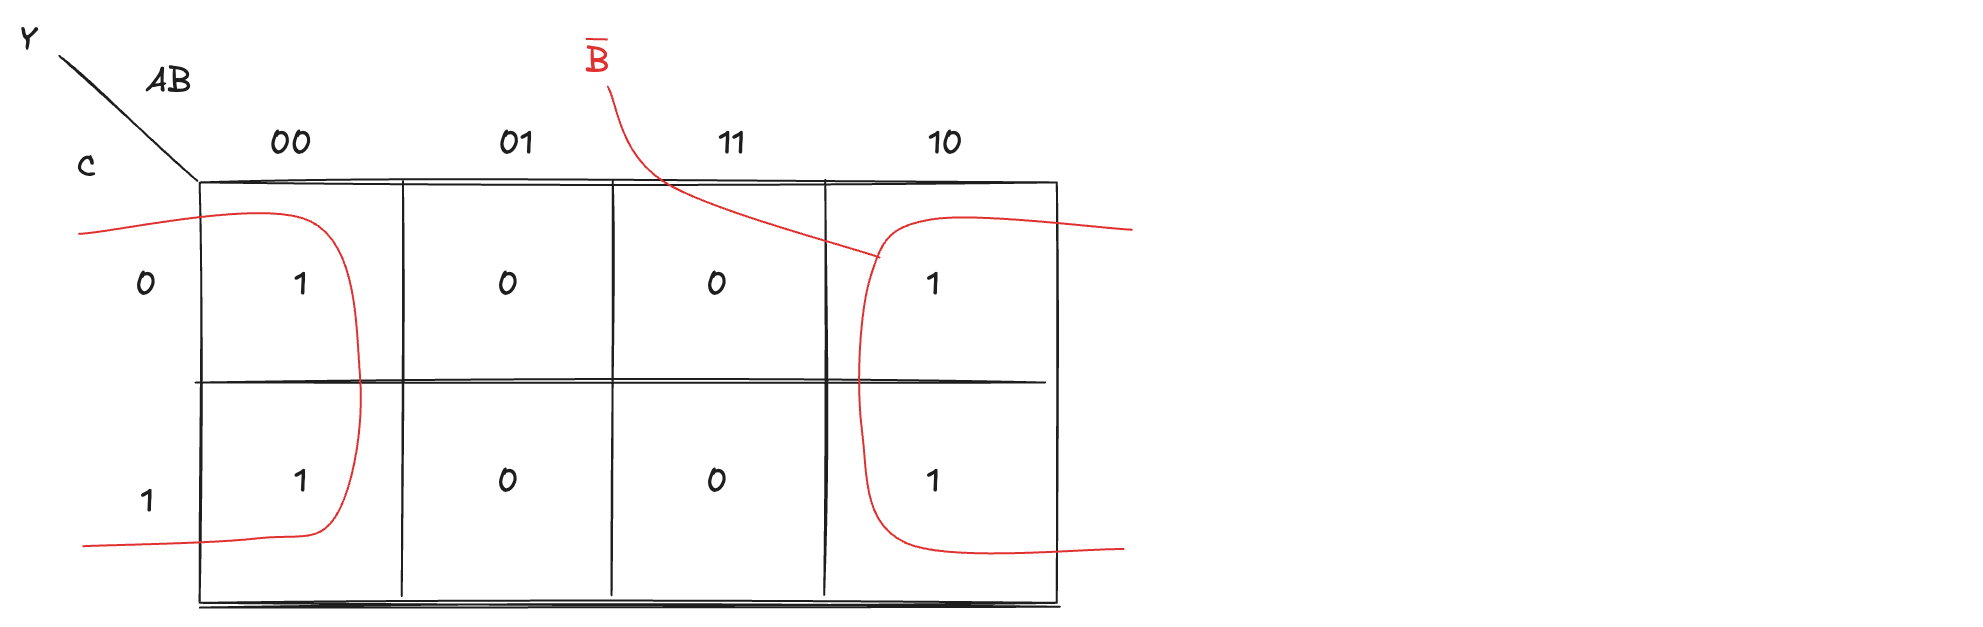

The largest subcube containing the 1s is highlighted:

$Y = B$

Let us now consider two limiting cases:

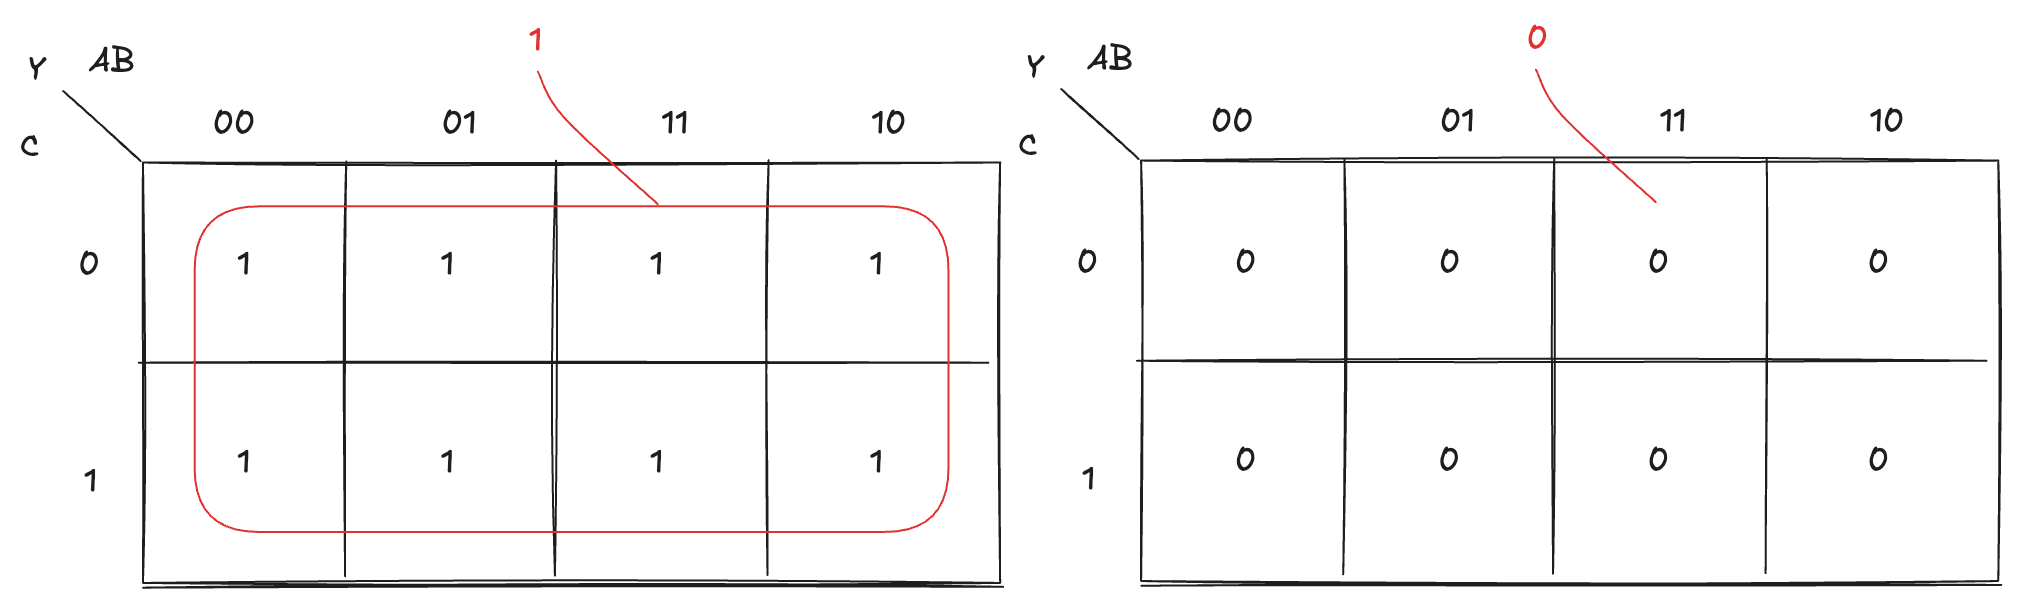

In the map on the left, every cell contains a 1, representing the constant function Y = 1. Conversely, the map on the right contains only 0s, corresponding to the constant function Y = 0.

It is important to note that a single 1 on the map **can belong to more than one group**. In other words, the same minterm may be covered by multiple overlapping groupings. This redundancy is intentional: forming larger groups helps eliminate more variables and leads to a simpler overall expression. When different groups share one or more cells, they represent alternative simplifications that all contribute to the final minimized function. The goal is not to avoid overlap but to **ensure that all 1s are covered by at least one group** while achieving the greatest possible simplification:

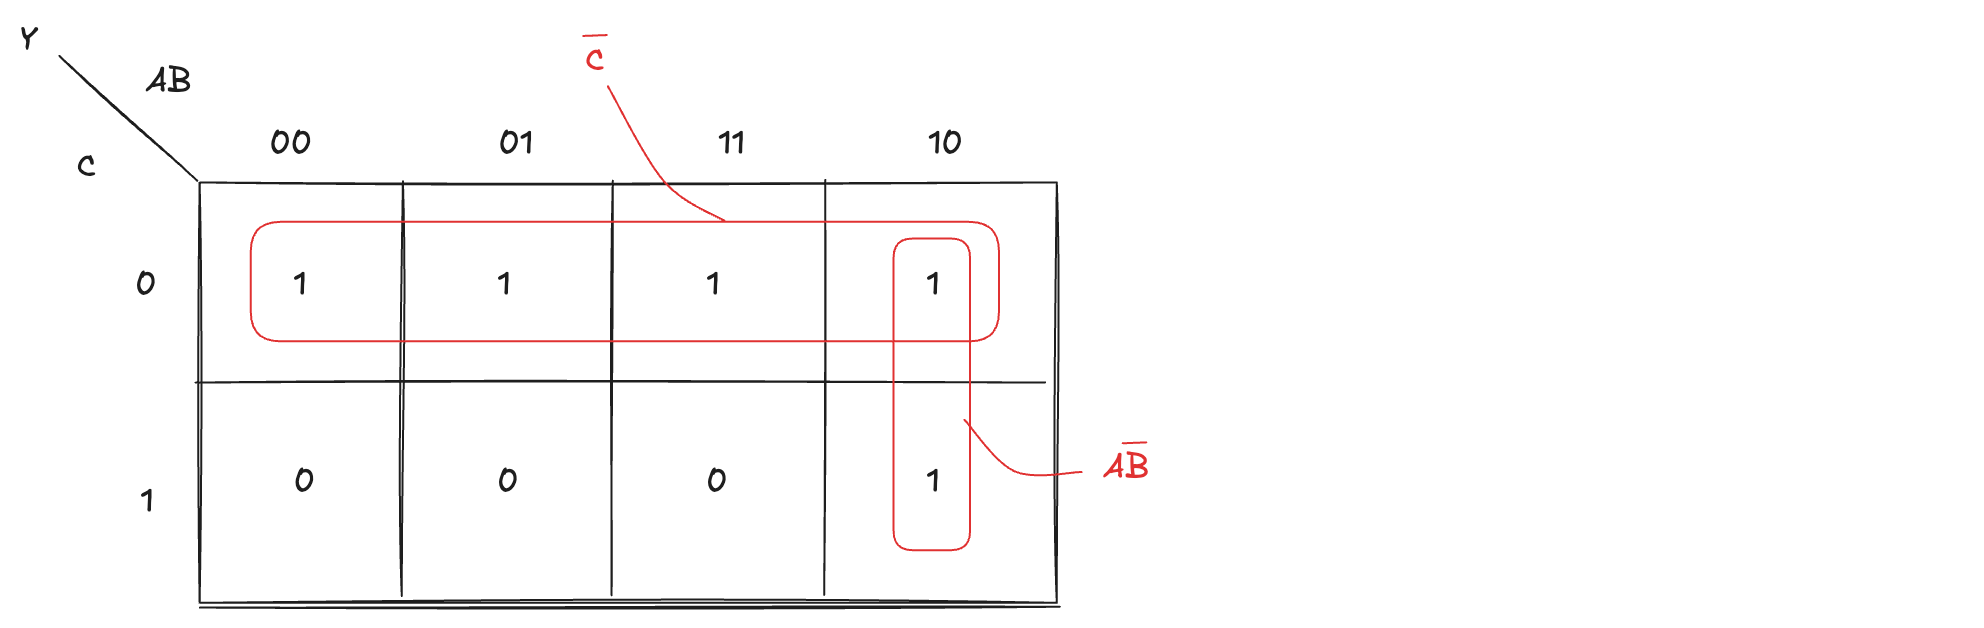

In the example:

$Y= A\overline{B} + \overline{C}$

The same principle applies to the four-variable map, where adjacency still corresponds to minterms that differ in the value of a single variable, as illustrated in the following example:

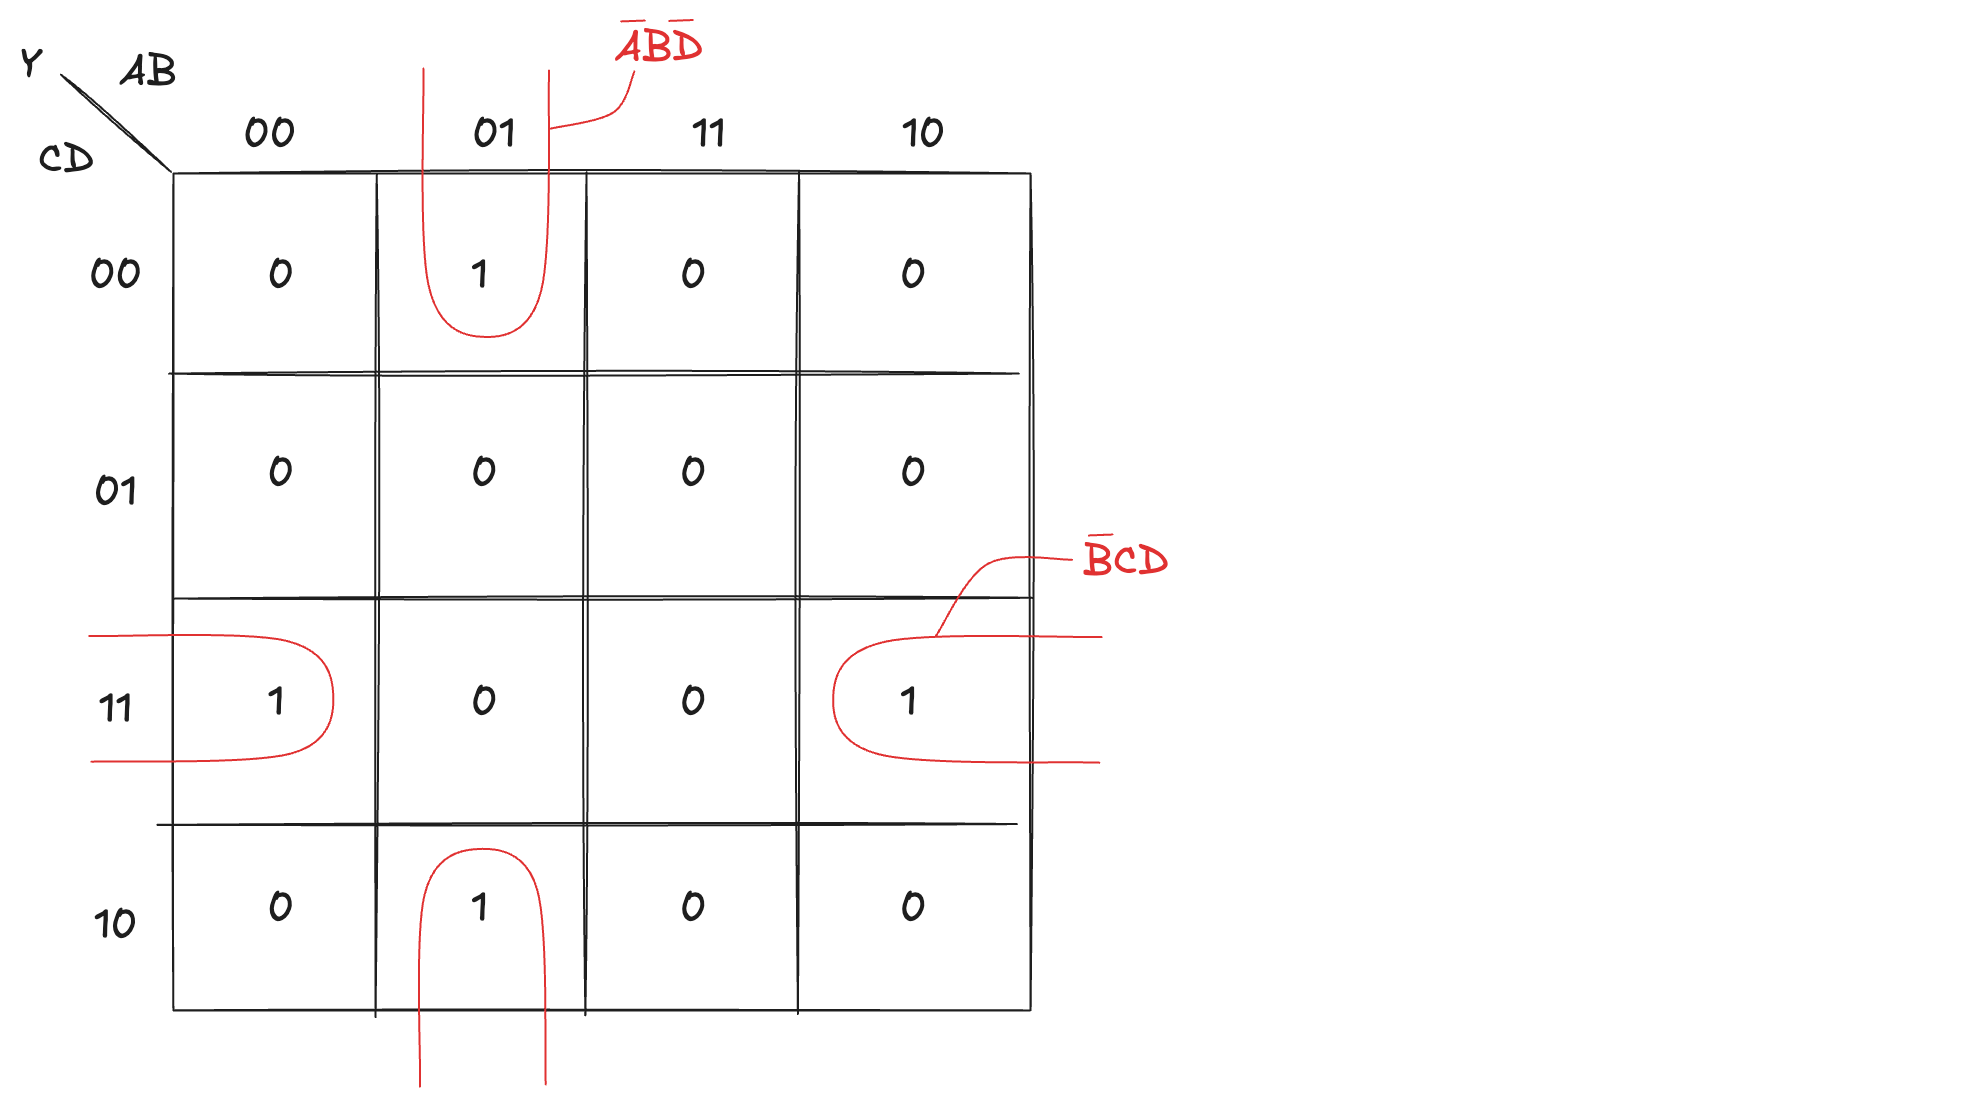

For this map:

$Y= \overline{A}B\overline{D} + \overline{B}CD$

Five-variable maps (order-5) can be represented by two order-4 maps, in which cells in the same position in the two maps are adjacent (imagine one map on the top of the other): 

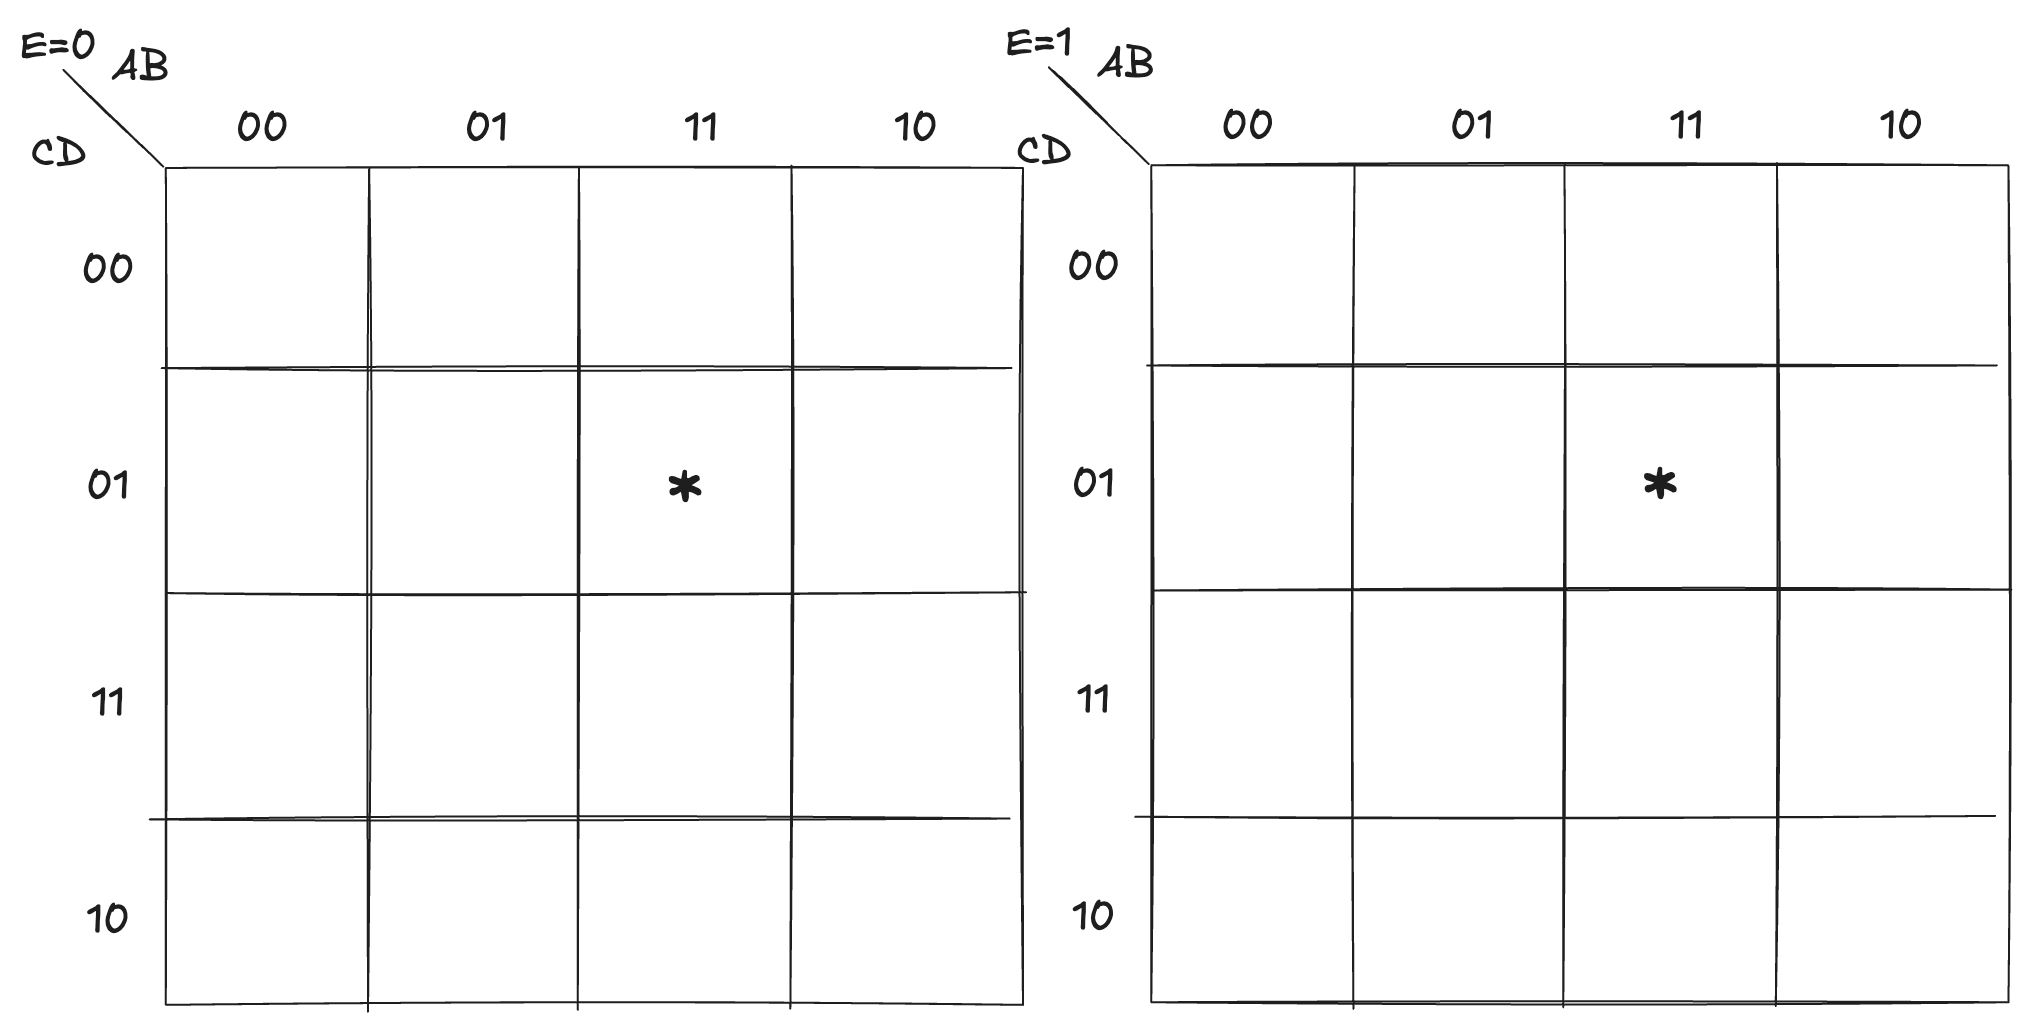

The cells marked with asterisks are adjacent, meaning they differ by only one variable. They can thus be combined into a single group, allowing the variable E to be eliminated from the resulting simplified expression. Six-variable maps are made with four order-4 maps. However those maps are too complicated to represent and use, so they are rarely employed in practice.

### POS Synthesis

In the AND-OR synthesis, we construct the function by focusing on the 1 of its truth table. Each 1 corresponds to a product term (an AND of input variables), where a variable appears in its direct form if its value is 1 and in complemented form if its value is 0. The outputs of all these AND gates are then combined through an OR operation to obtain the final expression.

In contrast, the **OR-AND synthesis** focuses on the 0 of the function. Each 0 is represented as a sum term (an OR of input variables), with each variable appearing direct if its value is 0 and negated if its value is 1. All these OR terms are then combined through an AND operation. We can consider the same example used for AND-OR synthesis:

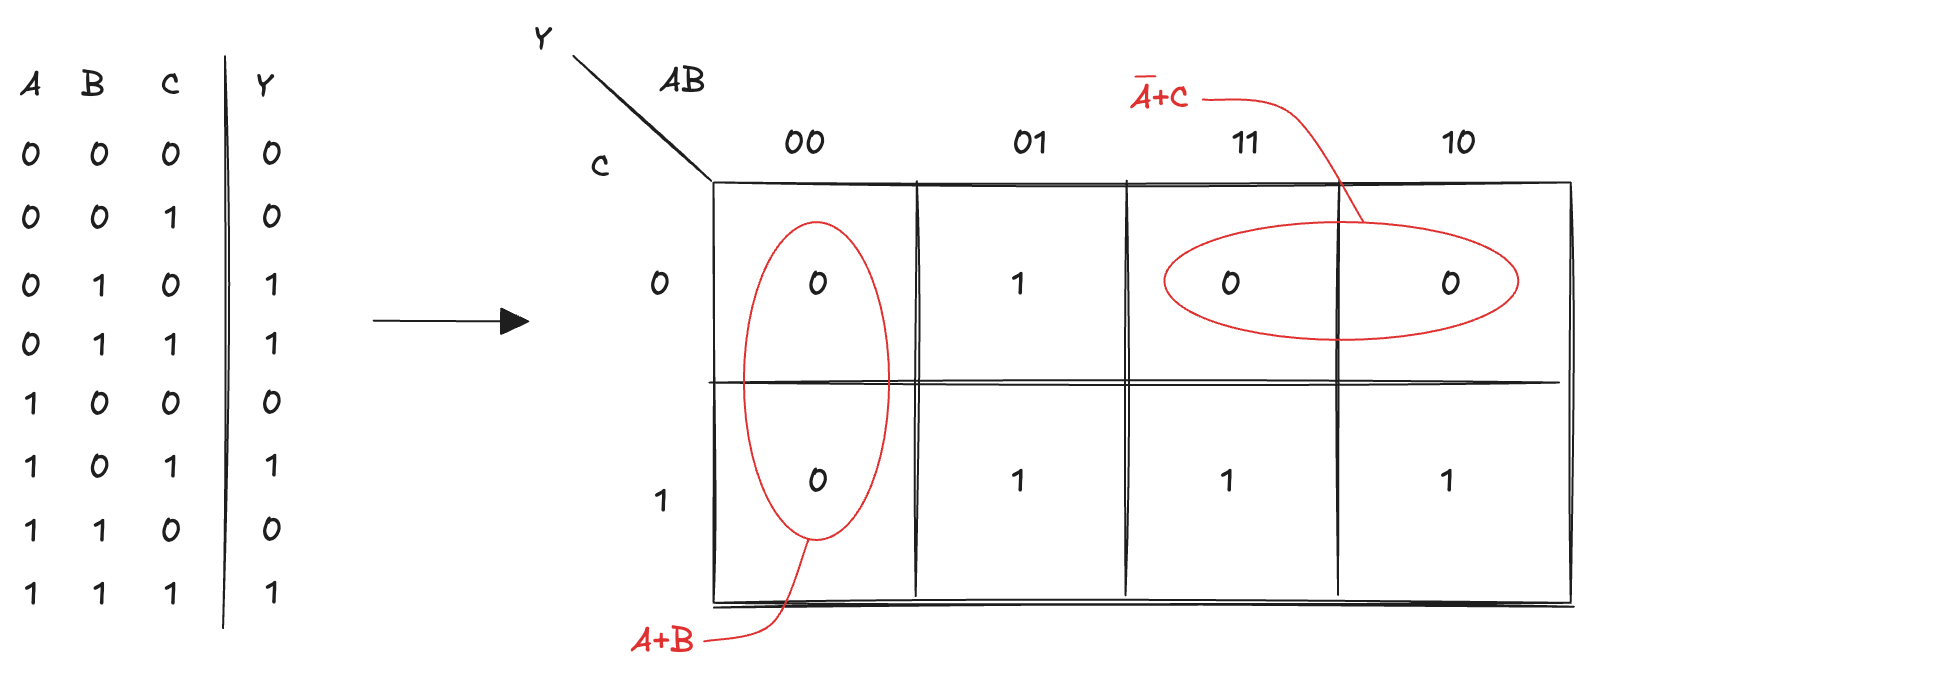

$Y=(A+B)(\overline{A}+C)$

We can show that it is equivalent to the previous expression derived using AND-OR synthesis:

$Y= \overline{A}B + A C$

Expanding the OR-AND expression:

$Y = (A + B)(\overline{A} + C)$

$= A\overline{A} + AC + B\overline{A} + BC$

$= 0 + AC + \overline{A}B + BC$

$= \overline{A}B + AC + BC$ (consensus))

$= \overline{A}B + AC$ 

### Multiple Minimal Forms

It is important to note that the **minimal set of prime implicants is not necessarily unique**. When simplifying a Boolean function, there may be **multiple valid combinations of prime implicants** that cover all the required 1 on the map. Each of these combinations yields a logically equivalent minimal expression, even though the individual terms may differ:

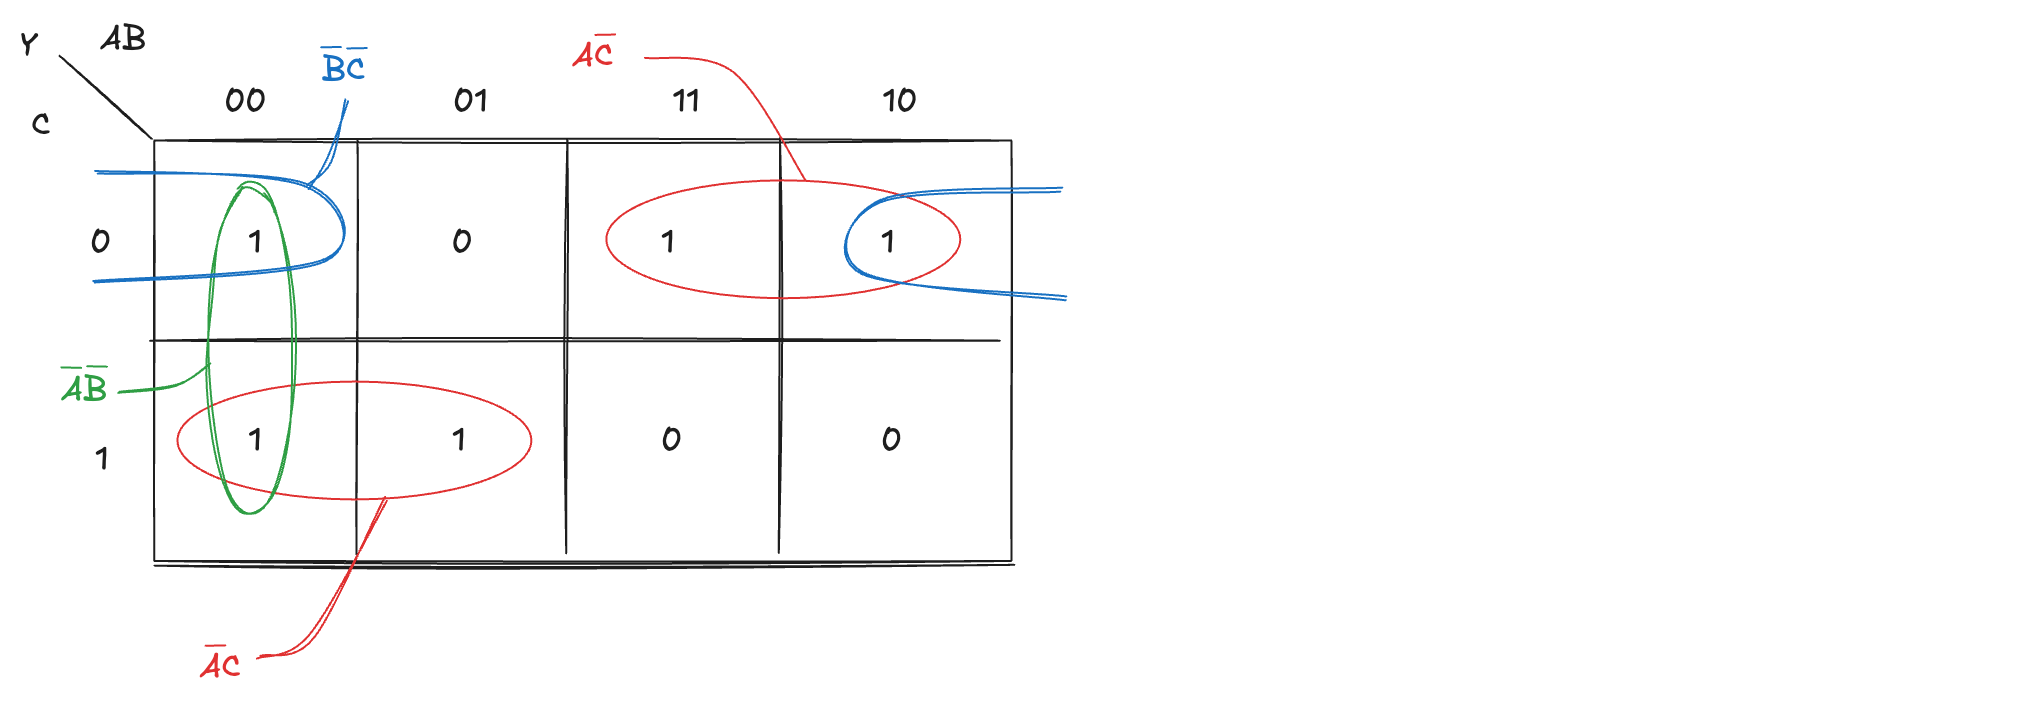

$Y = A\overline{C} + \overline{A}C + \overline{A}\,\overline{B}$

$Y = A\overline{C} + \overline{A}C + \overline{B}\,\overline{C}$

Both forms represent the same Boolean function. The difference lies in which implicants are chosen to cover the overlapping 1s, demonstrating that the **minimal expression is not unique**, since multiple sets of prime implicants can lead to equally simplified results.

This situation typically arises when certain 1s can be covered by more than one prime implicant of the same size. In such cases, the designer can choose among alternative minimal forms based on secondary criteria, such as implementation cost, gate count, or signal availability in a larger circuit.

Thus, **Karnaugh map simplification does not always lead to a single unique solution**, but rather to a **set of equally minimal alternatives**, all of which satisfy the same logical function.

## Seven-segment Display Controller

A **seven-segment display Controller** is a combinational logic circuit designed to drive a display which can show decimal digits from 0 to 9: 

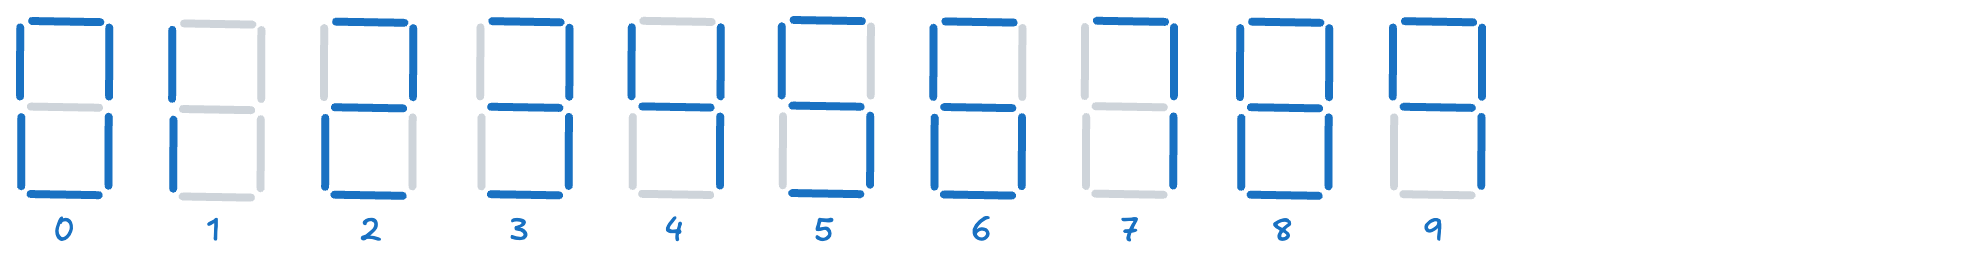

The display can represent 10 different decimal digits (from 0 to 9), and we need a unique input combination for each of those digits. The amount of information required to uniquely encode N distinct states using a binary code is given by

$D = log_2 N$

In our case, N=10. Thus,

$D = log_2 10 \approx 3.32$

Since the number of bits must be an integer, we round up to the next whole number, obtaining 4 bits. However, with 4 bits, we can represent up to 16 different combinations, which is more than sufficient to encode the ten decimal digits. So we have six **unused combinations** that do not correspond to any decimal digit.

The circuit generates seven output signals S, each corresponding to one of the segments of the display. By controlling which segments are turned on (logic 1) or off (logic 0), the controller forms the visual representation of the desired digit:

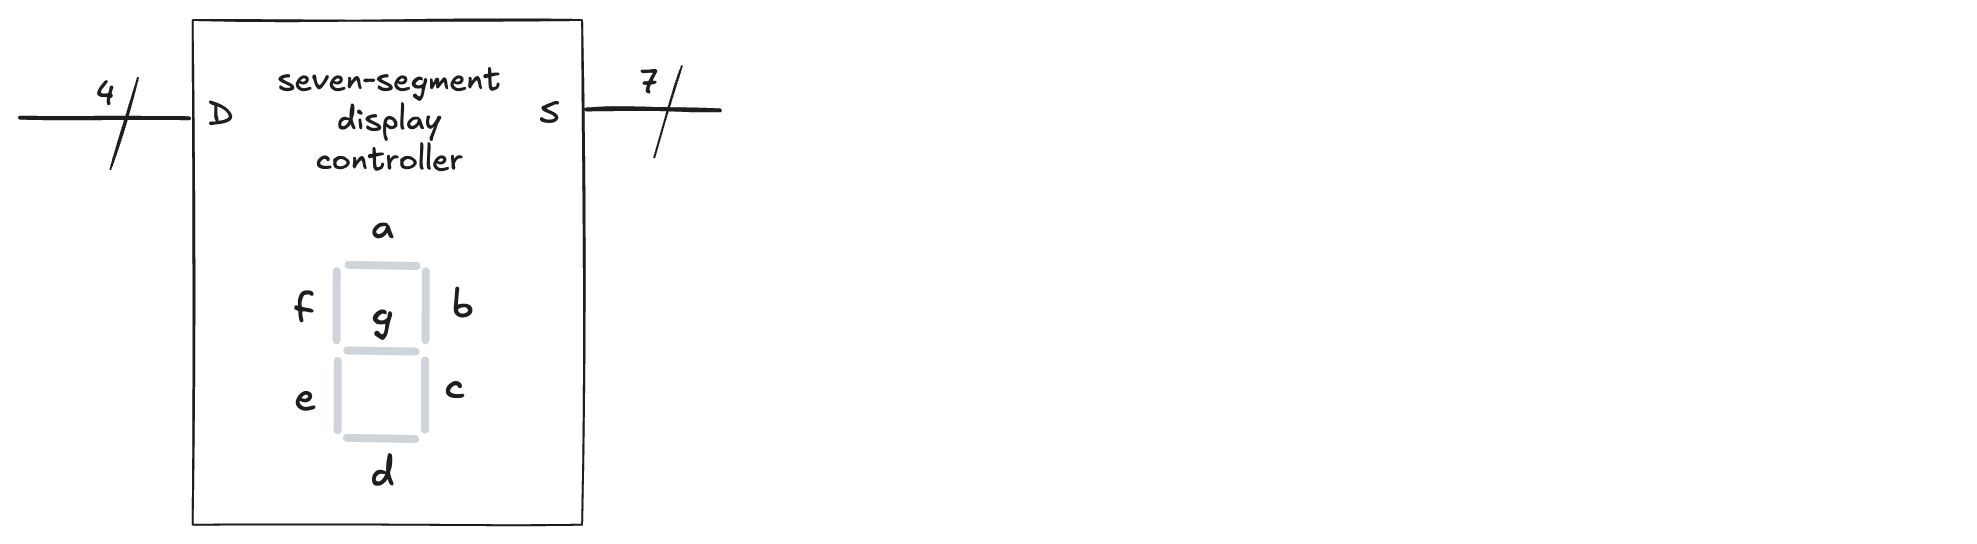

For example, to display the digit 0, all segments except the middle one (g) are activated. To display the digit 1, only segments b and c are turned on, and so on. The following truth table summarizes these relationships, showing for each 4-bit input which of the seven outputs should be active:

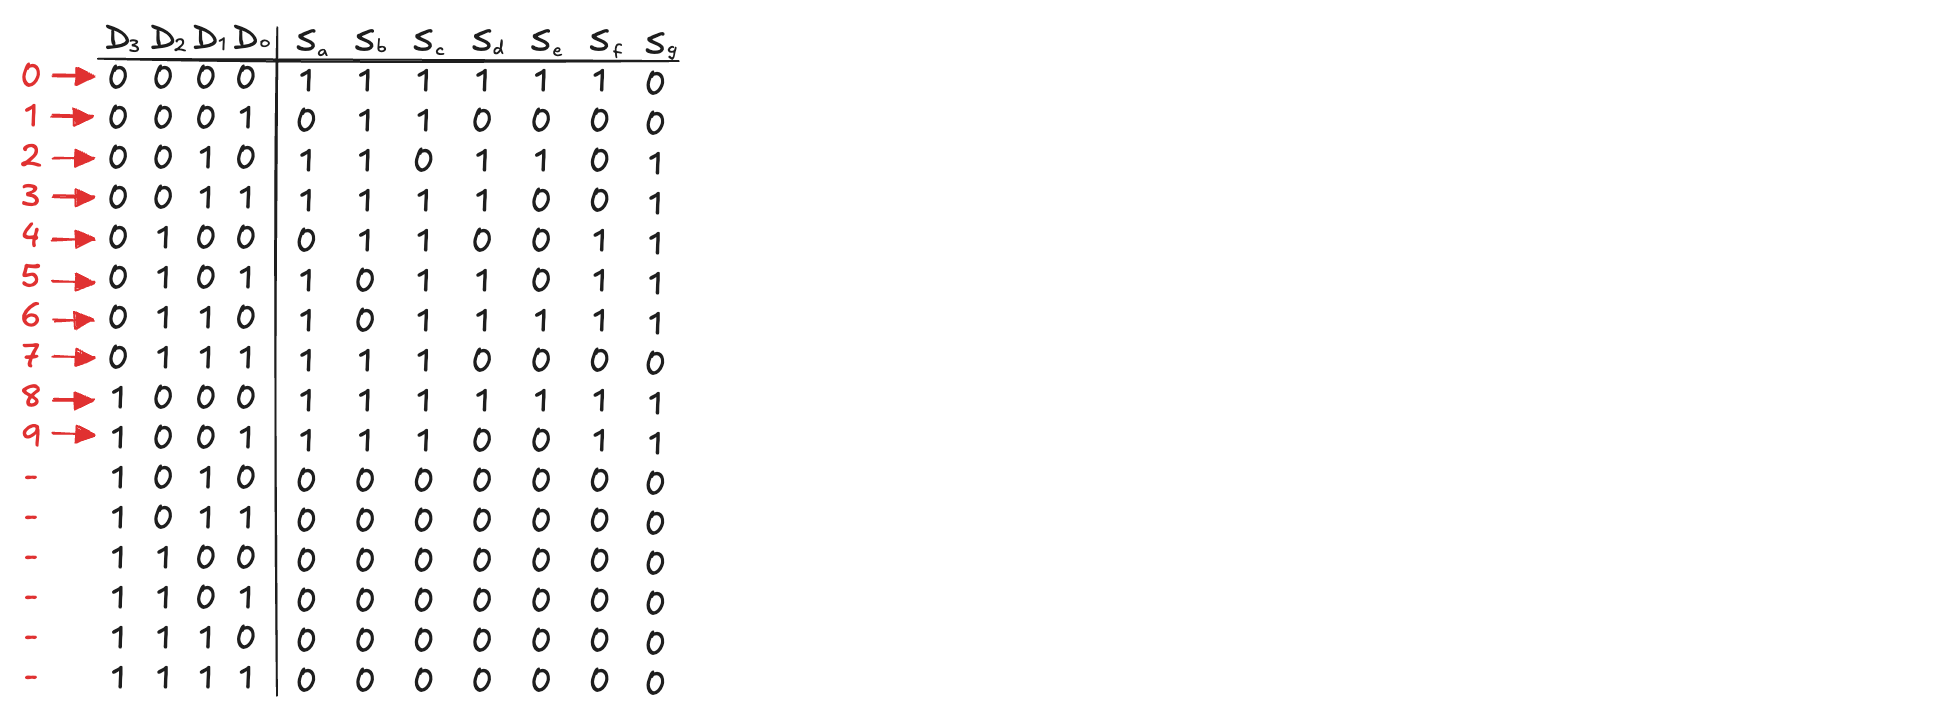

We derive the Karnaugh maps for each of the seven outputs:

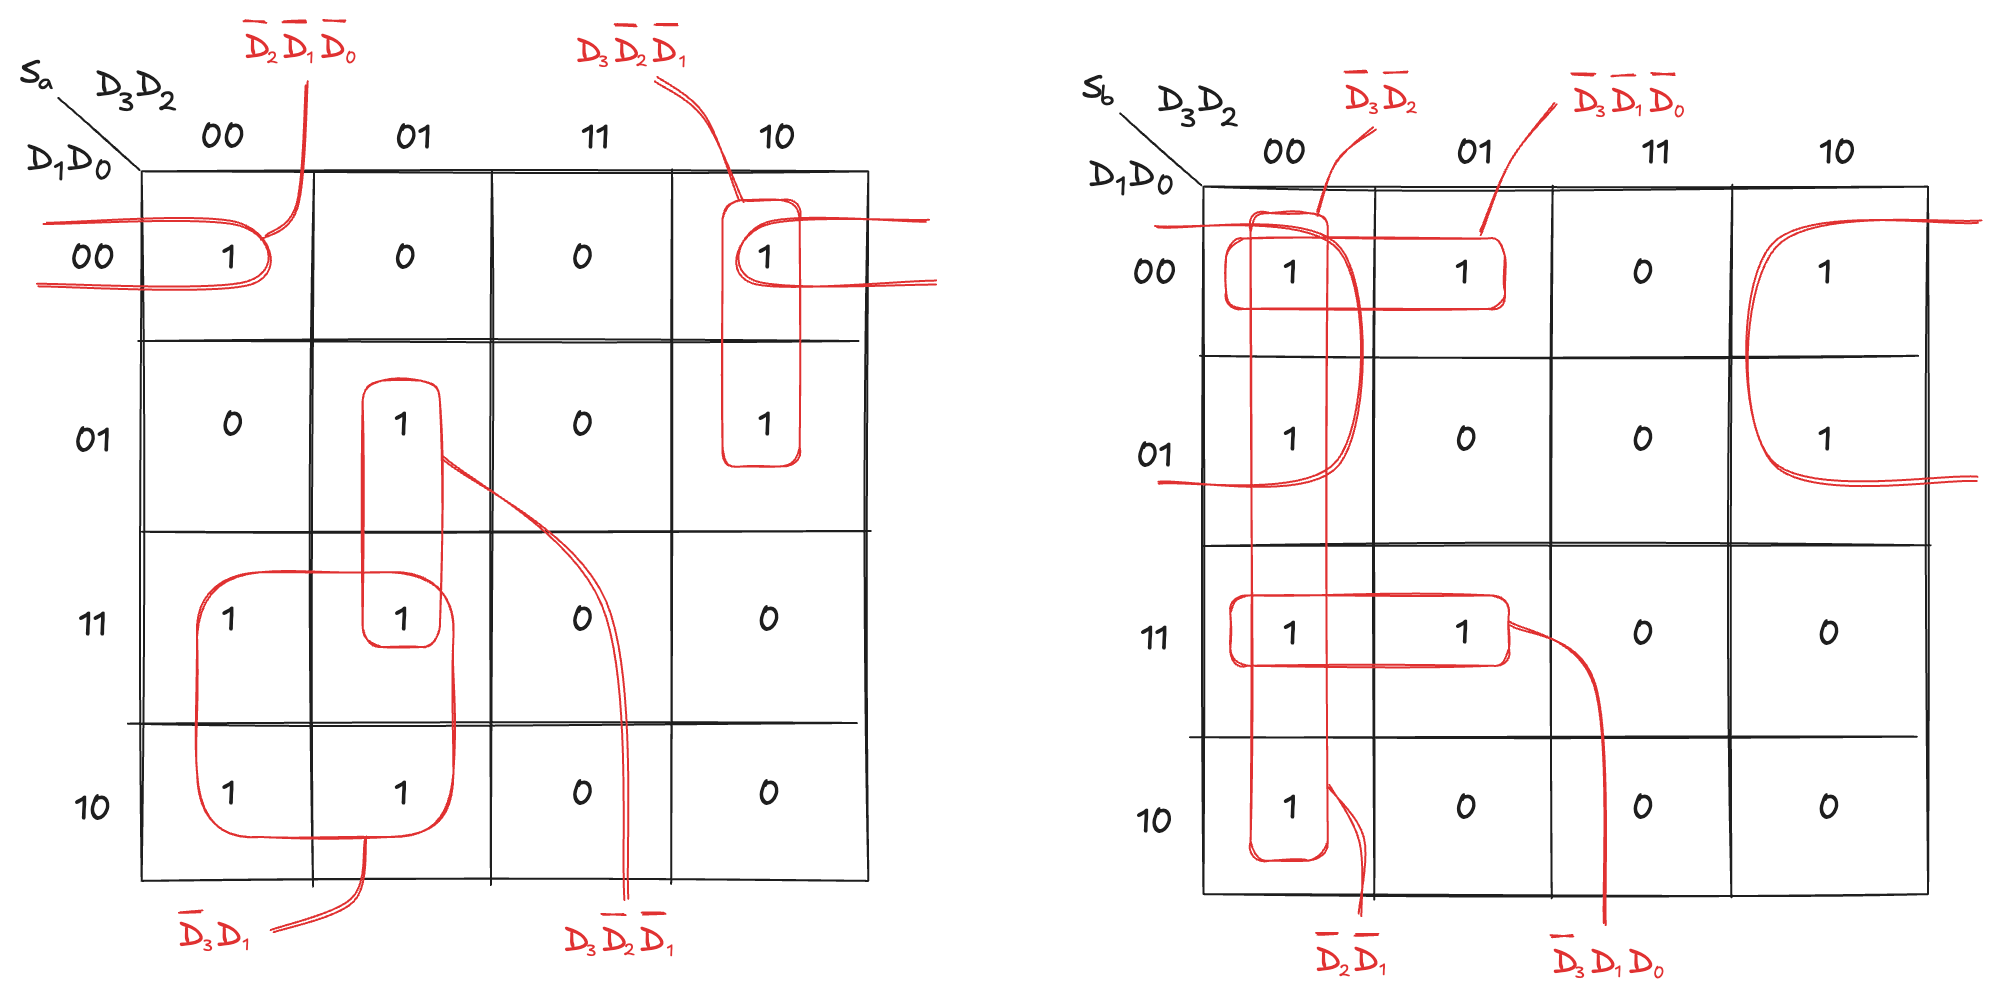

$S_a = \overline{D_2} \, \overline{D_1} \, \overline{D_0} + D_3 \, \overline{D_2} \, \overline{D_1} + \overline{D_3} \, D1 + D_3\,\overline{D_2}\,\overline{D_1}$

$S_b = \overline{D_3}\,\overline{D_2} + \overline{D_3}\,\overline{D_1}\,\overline{D_0} + \overline{D_2}\,\overline{D_1} + \overline{D_3}D_1D_0$

In a similar way, the logic expressions for the remaining segments can also be derived from their corresponding truth tables; however, we can exploit the “don’t-care” conditions to further simplify each Boolean function.


## Don't Cares

The "don’t-care" condition refers to input combinations or output values that are **irrelevant** to the intended operation of the circuit. They are denoted by the symbol X, meaning that the corresponding entry can be considered either 0 or 1. We can use don’t-cares to better optimize Boolean expressions: when certain input combinations never occur, or when the output is unimportant for specific cases. In a Karnaugh map, these X’s can be included in groups to form larger or fewer loops, further reducing the logic complexity, but they can also be ignored if they do not contribute to simplification.

Considering the seven-segment display, only ten input combinations are needed to represent the decimal digits from 0 to 9, leaving six combinations unused. When the input corresponds to a combination that does not represent a valid decimal digit, there are **two possible design approaches**:

- All segments off: the display remains blank (as we have done in the previous example).
- **Don’t-care handling**: the actual output pattern for these unused combinations is **ignored**.

Since the purpose of the device is to decode decimal digits, we assume that the input ABCD will always take values from 0000 to 1001 (that is, from 0 to 9 in decimal). If we are not concerned with what happens for the unused combinations, we can assign them the "don’t-care" symbol (X) in the truth table:

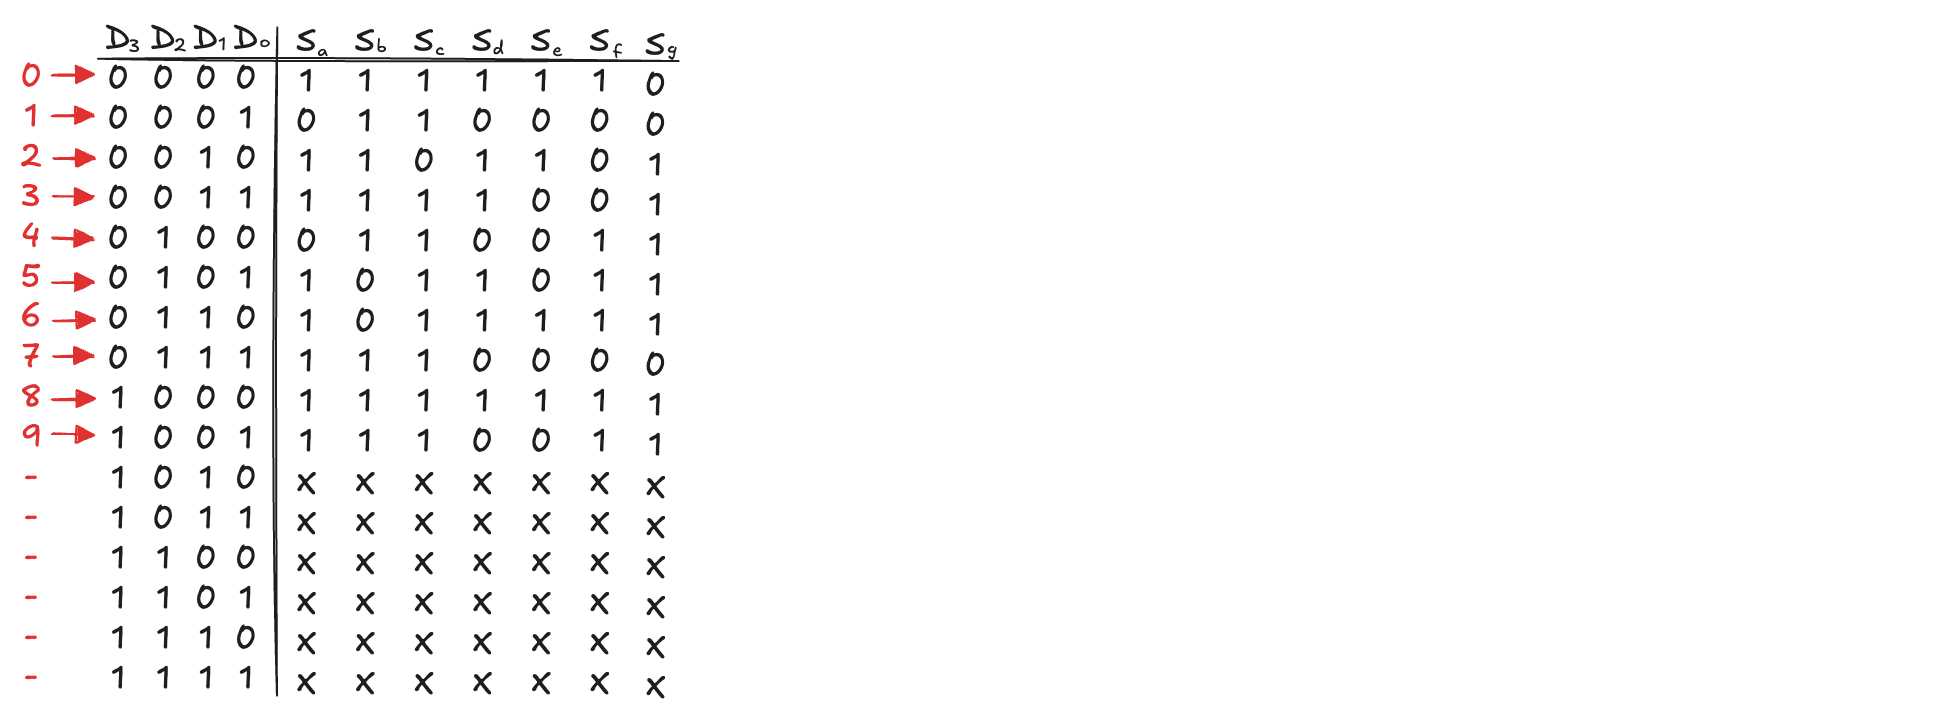

These don’t-care conditions **can then be treated as either 0 or 1, whichever leads to the simplest possible circuit** during logic minimization:

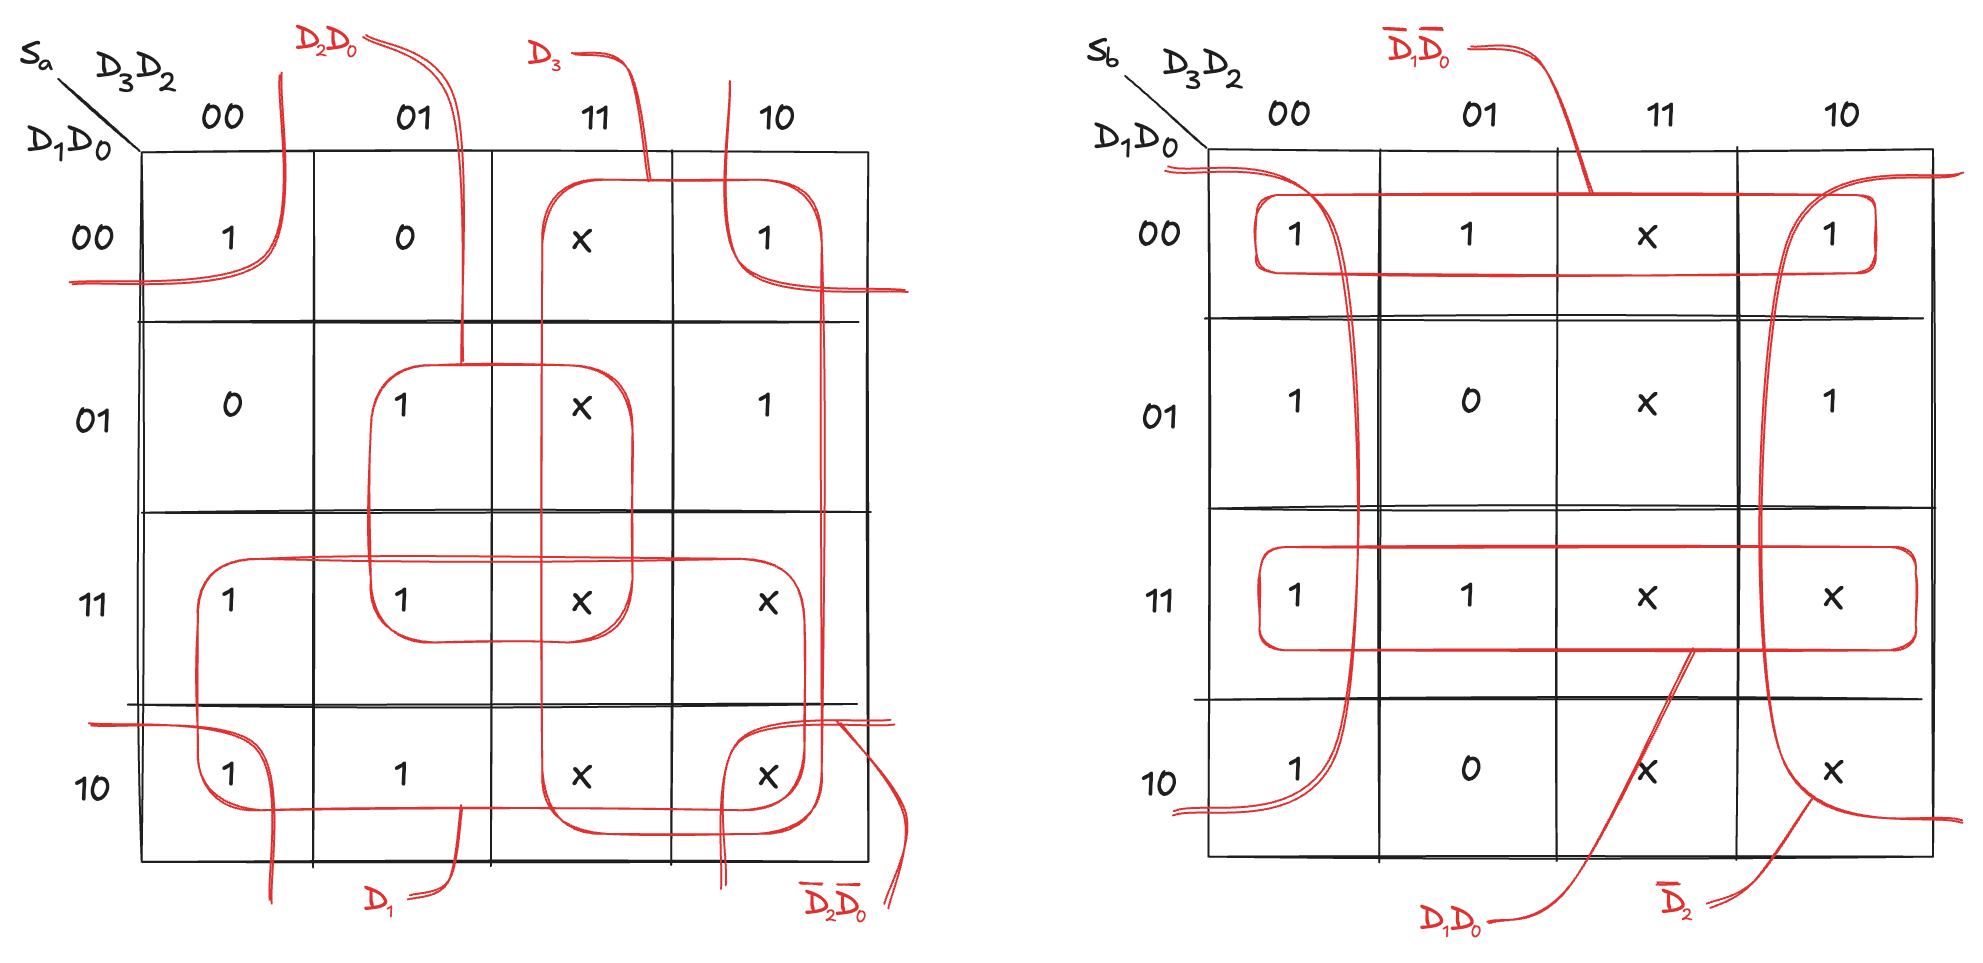

$S_a = D_3 + D_1 + \overline{D_2}\,\overline{D_0} + D_2D_0$

$S_b = \overline{D_3} + \overline{D_1}\,\overline{D_0} + D_1D_0$

The presence of don’t-cares **allows larger groupings** and thus fewer product terms compared to what would be possible without them. This results in simpler logic, fewer gates, and a more efficient hardware implementation. However, their use also introduces certain risks and potential drawbacks. When a designer assumes that specific input combinations will never occur, the resulting circuit may **behave unpredictably if such combinations do appear in practice** (for example, due to noise, timing glitches, or unexpected input values from other parts of the system). This can lead to incorrect outputs or unstable display behavior. In **safety-critical** or **high-reliability** applications, these undefined states may propagate through the logic, causing unpredictable or even hazardous system responses. Therefore, although don’t-cares simplify the design and save hardware resources, they must be used carefully and only when it is guaranteed that the corresponding input conditions truly cannot occur during normal operation.

## Quine–McCluskey Method

Karnaugh maps, which become impractical for simplifying Boolean expressions involving more than four variables. The **Quine–McCluskey method** can be thought of as the **algorithmic version*** of the manual process used with Karnaugh maps. Its main intuition lies in replacing the visual pattern recognition of adjacent 1 in a K-map with a **systematic, tabular comparison** of binary terms. Conceptually, the method explores the same simplification principle that underlies Boolean minimization: **if two terms differ only by the value of one variable, that variable can be eliminated**. The method is useful because it provides a **automatable process**. Unlike K-maps, which rely on human pattern recognition and are limited to about four variables, Quine–McCluskey can handle many more variables and forms the foundation of **logic minimization algorithms** used in computer-aided design (CAD) tools today. In order to illustrate the method, consider the following function of four variables:

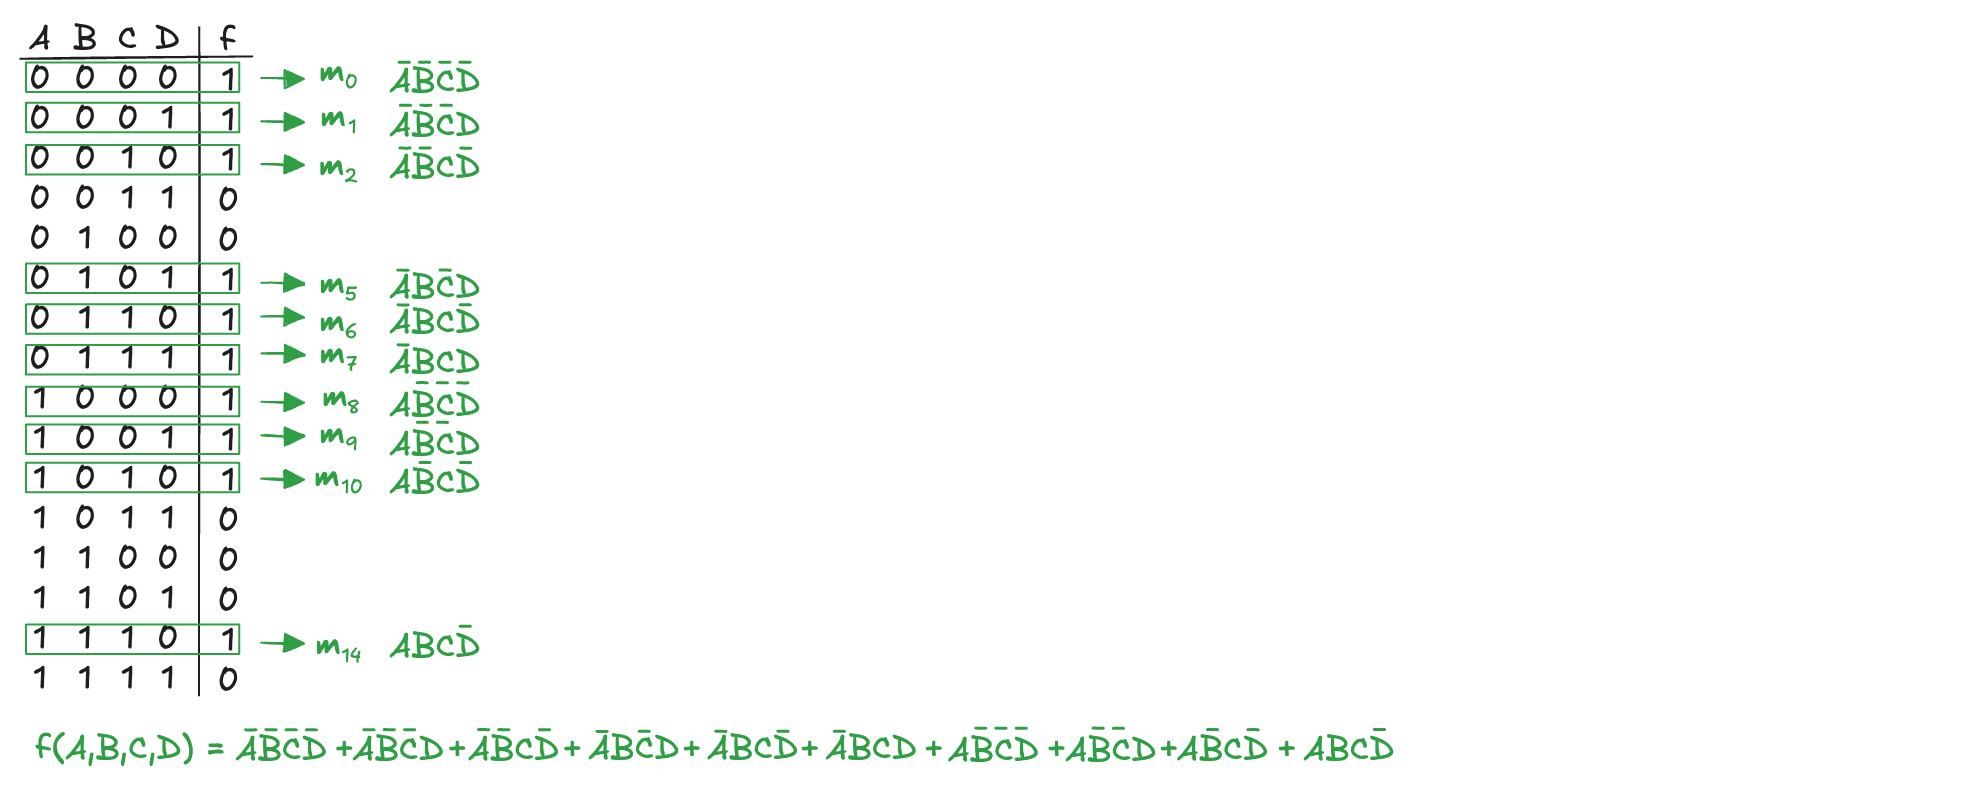

The algorithm’s first phase performs an exhaustive expansion, identifying all **prime implicants** that cannot be simplified further. The second covering step selects the smallest set of these prime implicants that still represents all the original 1 in the truth table.

### Expansion Phase

The first step is to **express each minterm with a binary number** (with 1s and 0s representing the true and complemented variables) and **group them according to the number of 1s** they contain:

| Minterm  | Binary  | Number of 1s  |
|----------|---------|---------------|
| $m_0$    | 0000    | 0             |
| $m_1$    | 0001    | 1             |
| $m_2$    | 0010    | 1             |
| $m_5$    | 0101    | 2             |
| $m_6$    | 0110    | 2             |
| $m_7$    | 0111    | 3             |
| $m_8$    | 1000    | 1             |
| $m_9$    | 1001    | 2             |
| $m_{10}$ | 1010    | 2             |
| $m_{14}$ | 1110    | 3             |

As $m_0$ has no 1 in its representation it is kept in one group (0). Similarly, $m_1$, $m_2$ and $m_8$ contain one 1 in their representation so they are kept in the next group (1). And so on: $m_5$, $m_6$, $m_9$, and $m_{10}$ in the next group (2), $m_7$ and $m_{14}$ in the next group(3):

| Group | Minterms                      | Binary Numbers         |
|-------|-------------------------------|------------------------|
| 0     | $m_0$                         | 0000                   |
| 1     | $m_1$, $m_2$, $m_8$           | 0001, 0010, 1000       |
| 2     | $m_5$, $m_6$, $m_9$, $m_{10}$ | 0101, 0110, 1001, 1010 |
| 3     | $m_7$, $m_{14}$               | 0111, 1110             |

Then we **compare the minterms in adjacent groups** (groups that differ by one in the number of 1s) to **identify pairs that differ by exactly one bit**. When such a pair is found, we combine them into a new term by replacing the differing bit with a dont'care (X), indicating that this variable can take either value (0 or 1). Also, place a check mark (V) to every minterm that has been combined with at least one minterm. This process effectively eliminates variables from the expression. For example, comparing $m_0$ (0000) from group 0 with $m_1$ (0001) from group 1, we see they differ only in the last bit. We combine them to form the new term 000-. This is the table of minterms showing which have been combined in our example:

| Minterm  | Combined |
|----------|----------|
| $m_0$    | V        | 
| $m_1$    | V        | 
| $m_2$    | V        | 
| $m_5$    | V        | 
| $m_6$    | V        | 
| $m_7$    | V        | 
| $m_8$    | V        | 
| $m_9$    | V        | 
| $m_{10}$ | V        | 
| $m_{14}$ | V        | 

And this table summarizes the combinations made:

| Group | Pair Minterms                    | Combined Term |
|-------|----------------------------------|---------------|
| 0 & 1 | $m_0$ (0000), $m_1$ (0001)       | 000X          |
| 0 & 1 | $m_0$ (0000), $m_2$ (0010)       | 00X0          |
| 0 & 1 | $m_0$ (0000), $m_8$ (1000)       | X000          |
| 1 & 2 | $m_1$ (0001), $m_5$ (0101)       | 0X01          |
| 1 & 2 | $m_1$ (0001), $m_9$ (1001)       | X001          |
| 1 & 2 | $m_2$ (0010), $m_6$ (0110)       | 0X10          |
| 1 & 2 | $m_2$ (0010), $m_{10}$ (1010)    | X010          |
| 1 & 2 | $m_8$ (1000), $m_9$ (1001)       | 100X          |
| 1 & 2 | $m_8$ (1000), $m_{10}$ (1010)    | 10X0          |
| 2 & 3 | $m_5$ (0101), $m_7$ (0111)       | 01X1          |
| 2 & 3 | $m_6$ (0110), $m_7$ (0111)       | 011X          |
| 2 & 3 | $m_6$ (0110), $m_{14}$ (1110)    | X110          |
| 2 & 3 | $m_{10}$ (1010), $m_{14}$ (1110) | 1X10          |

This combination process is **repeated iteratively**, comparing the newly formed terms to identify additional possible merges. In this step, two terms can be combined **only if they differ by a single bit** and have their **don't cares in the same positions**. Terms with don't cares in different positions cannot be combined, as they would differ in more than one variable. The following table summarizes the pairs of terms that can be combined in this iteration:

| Minterm                   | Combined |
|---------------------------|----------|
| $m_0$, $m_1$ (000X)       | V        |
| $m_0$, $m_2$ (00X0)       | V        |
| $m_0$, $m_8$ (X000)       | V        |
| $m_1$, $m_5$ (0X01)       |          |
| $m_1$, $m_9$ (X001)       | V        |
| $m_2$, $m_6$ (0X10)       | V        |
| $m_2$, $m_{10}$ (X010)    | V        |
| $m_8$, $m_9$ (100X)       | V        |
| $m_8$, $m_{10}$ (10X0)    | V        |
| $m_5$, $m_7$ (01X1)       |          |
| $m_6$, $m_7$ (011X)       |          |
| $m_6$, $m_{14}$ (X110)    | V        |
| $m_{10}$, $m_{14}$ (1X10) | V        |

And this table summarizes the new combinations made:

| Term 1                 | Term 2                    | Combined Term |
|------------------------|---------------------------|---------------|
| $m_0$, $m_1$ (000X)    | $m_8$, $m_9$ (100X)       | X00X          |
| $m_0$, $m_2$ (00X0)    | $m_8$, $m_{10}$ (10X0)    | X0X0          |
| $m_0$, $m_8$ (X000)    | $m_1$, $m_9$ (X001)       | X00X          |
| $m_0$, $m_8$ (X000)    | $m_2$, $m_{10}$ (X010)    | X0X0          |
| $m_2$, $m_6$ (0X10)    | $m_{10}$, $m_{14}$ (1X10) | XX10          |
| $m_2$, $m_{10}$ (X010) | $m_6$, $m_{14}$ (X110)    | XX10          |

This process continues **until no further combinations are possible**. The terms that have not been combined are identified as **prime implicants**. In this example, the prime implicants are:

- $\overline{A}\,\overline{C}D$ from (0X01)      
- $\overline{A}BD$ from (01X1)
- $\overline{A}BC$ from (011X)        
- $\overline{B}\,\overline{C}$ from (X00X)
- $\overline{B}\,\overline{D}$ from (X0X0)
- $C\overline{D}$ from (XX10)

### Combination Phase

In the second phase of the Quine–McCluskey method, we need to select a minimal set of prime implicants that covers all the original minterms. This is done by constructing a **prime implicant chart**, which maps each minterm to the prime implicants that cover it:

|                                      | $m_0$ (0000) | $m_1$ (0001) | $m_2$ (0010) | $m_5$ (0101) | $m_6$ (0110) | $m_7$ (0111) | $m_8$ (1000) | $m_9$ (1001) | $m_{10}$ (1010) | $m_{14}$ (1110) |
|--------------------------------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|-----------------|-----------------|
| $\overline{A}\,\overline{C}D$ (0X01) |              | V            |              | V            | V            |              |              |              |                 |                 |
| $\overline{A}BD$ (01X1)              |              |              |              | V            |              | V            |              |              |                 |                 | 
| $\overline{A}BC$ (011X)              |              |              |              |              | V            | V            |              |              |                 |                 | 
| $\overline{B}\,\overline{C}$ (X00X)  | V            | V            |              |              |              |              | V            | V            |                 |                 | 
| $\overline{B}\,\overline{D}$ (X0X0)  | V            |              | V            |              |              |              | V            |              | V               |                 |
| $C\overline{D}$ (XX10)               |              |              | V            |              | V            |              |              |              | V               | V               |

From the chart, we can identify **essential prime implicants**, those that cover minterms not covered by any other implicant. In this case, the essential prime implicants are:

- $\overline{B}\,\overline{C}$ (X00X) which is the only one covering $m_9$ (1001)
- $C\overline{D}$ (XX10) which is the only one covering $m_{14}$ (1110)

By selecting these essential prime implicants, we cover also other minterms:

- $\overline{B}\,\overline{C}$ (X00X) covers also $m_0$ (0000), $m_1$ (0001), and $m_8$ (1000)
- $C\overline{D}$ (XX10) covers also $m_2$ (0010), $m_6$ (0110), and $m_{10}$ (1010)

Next, we look for the remaining minterms that are not yet covered and we need to **select additional prime implicants** to cover them, aiming to minimize the total number of implicants used. In our example:

- $m_5$ (0101) is covered by both $\overline{A}\,\overline{C}D$ (0X01) and $\overline{A}BD$ (01X1)
- $m_7$ (0111) is covered by both $\overline{A}BD$ (01X1) and $\overline{A}BC$ (011X)

So we can choose $\overline{A}BD$ (01X1) to cover both $m_5$ and $m_7$.

Finally, we can collect all essential and non-redudat implicants to form the minimized Boolean expression:

$f(A,B,C,D) = \overline{B}\,\overline{C} + C\overline{D} + \overline{A}BD$

We can check the result using a Karnaugh map:

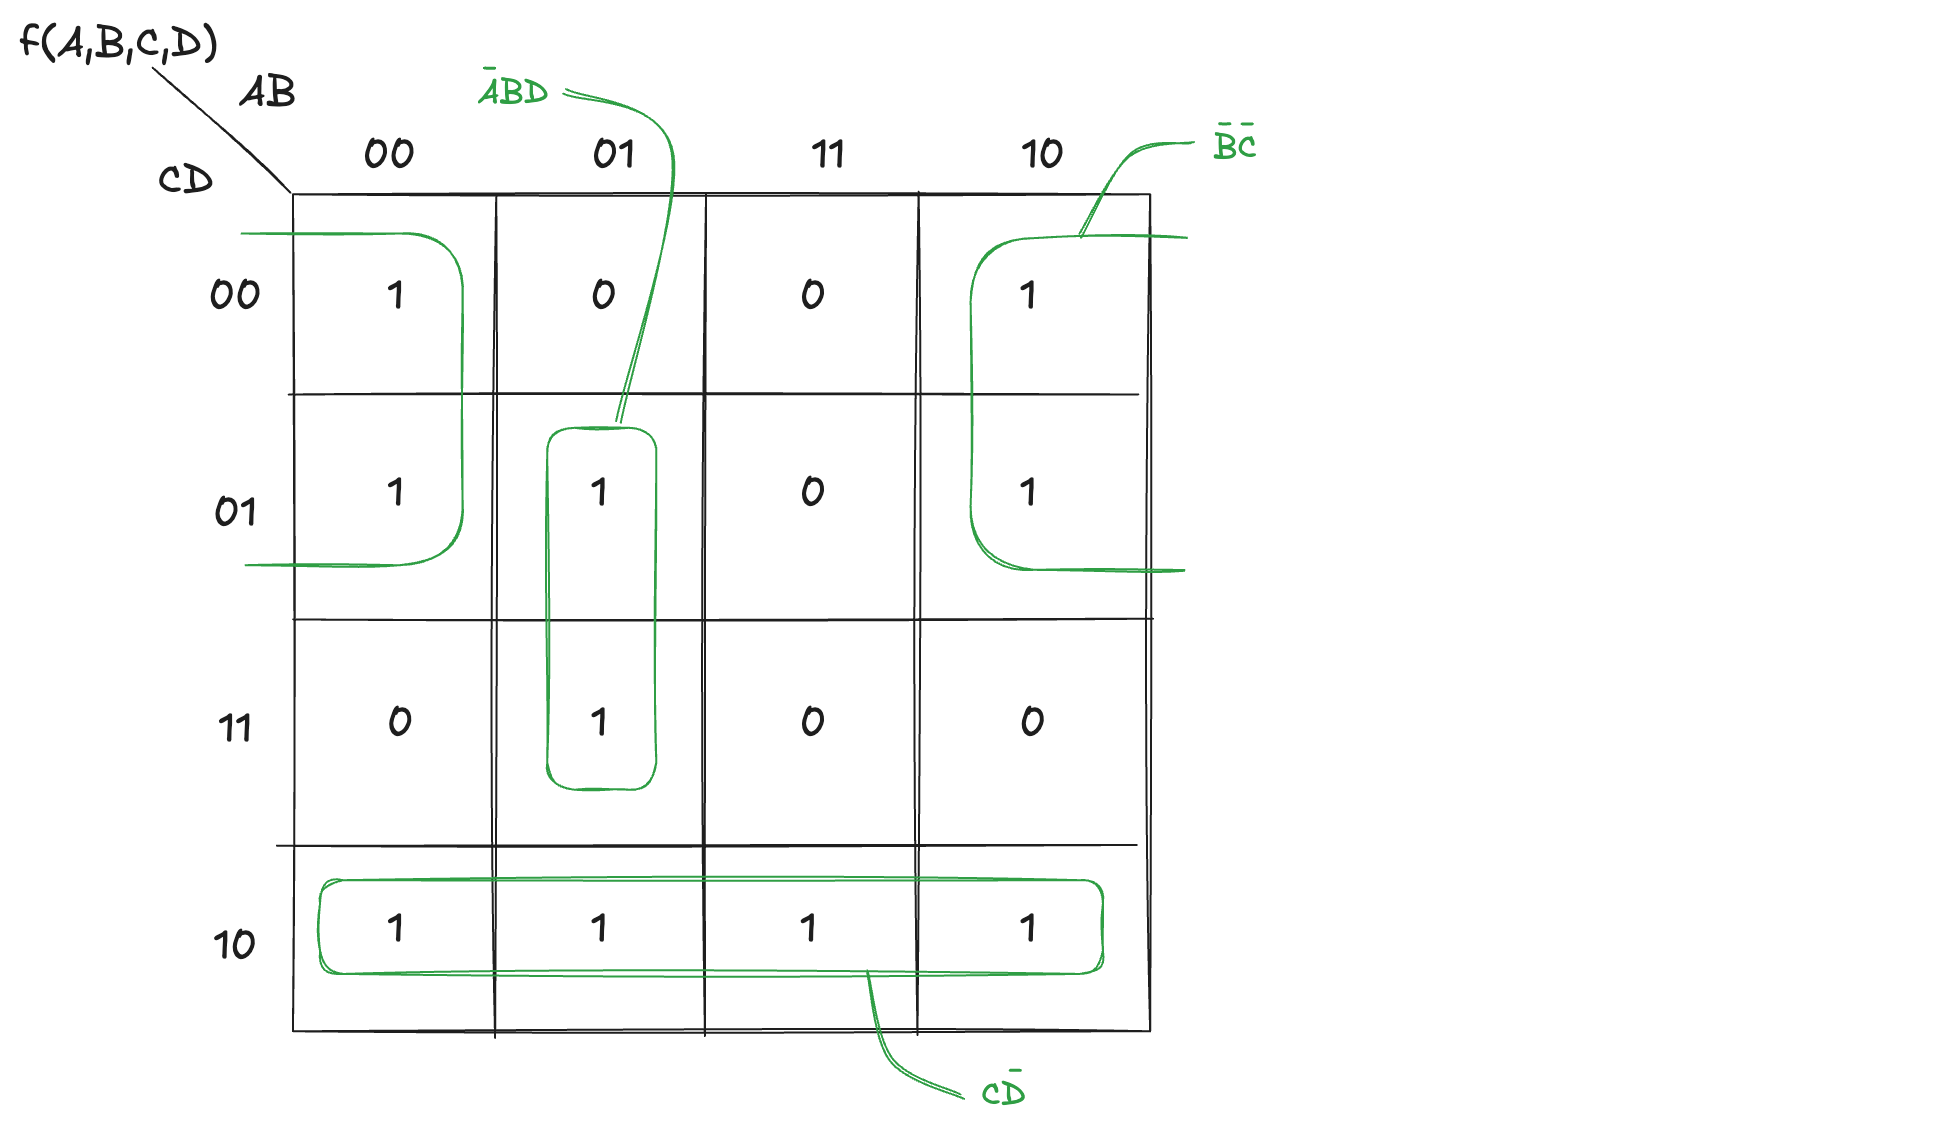

The Quine–McCluskey method provides a systematic and automatable approach to Boolean minimization, making it particularly suitable for **computer-aided design (CAD)** tools used in digital logic synthesis. Its tabular structure translates well into software algorithms that can handle logic reduction without human intervention. However, its **computational complexity grows exponentially** with the number of variables, since the number of possible combinations and prime implicants increases rapidly. For this reason, while Quine–McCluskey is ideal for educational purposes and small-scale circuits, modern CAD systems employ **more advanced heuristic** (such as the **Espresso algorithm**) to find **near-optimal implementations** of logic functions when exact algorithms become computationally infeasible.